In [22]:
import folium
import pandas as pd
import numpy as np
from geopy.distance import geodesic as GD

In [17]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),dup_res,ОПлощадь,Оплощадь_перв,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,NaN,70.3,70.3 м²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,143589.743590,NaN,78.0,78 м²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,NaN,40.4,40.4 м²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,187500.000000,NaN,30.4,30.4 м²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,91304.347826,NaN,23.0,23 м²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13327,8462_авито,0,авито,15.250571,4199900,0,126503.012048,NaN,33.2,33.2 м²,...,NaN,NaN,NaN,NaN,NaN,Квартал «Олимпика»,Дом 12.5,другое,Сдан 4 кв. 2022,NaN
13328,8463_авито,0,авито,15.384126,4800000,0,166089.965398,NaN,28.9,28.9 м²,...,NaN,NaN,NaN,NaN,NaN,ЖК «Космос»,Дом 2 (Кассиопея),другое,Сдан 3 кв. 2023,NaN
13329,8464_авито,0,авито,15.293700,4385000,0,141451.612903,NaN,31.0,31 м²,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
13330,8465_авито,1,авито,15.332833,4560000,0,106046.511628,NaN,43.0,43 м²,...,NaN,NaN,NaN,NaN,NaN,ЖК «River Park»,NaN,другое,Сдан 4 кв. 2023,NaN


In [5]:
l = []
centre = (56.837716, 60.596828) #площадь 1905 года
k = len(df['Широта'])

for j in range(0, k, 1):
    dote = (df['Широта'][j], df['Долгота'][j])
    dis = GD(centre, dote).km * 1000
    l.append(dis)
l

[5858.724488838673,
 3732.854970639654,
 2742.075053225843,
 7940.1244958416455,
 7764.49345849088,
 4346.538443371625,
 8068.164466666092,
 3316.949876698073,
 951.8944452927777,
 6901.273087022803,
 8780.402461958196,
 2296.760244537651,
 2602.940302632921,
 7750.053696526387,
 3843.03778022693,
 426.2051118618577,
 2058.306453780755,
 7139.702550421428,
 11743.16958354196,
 3634.443424150729,
 3078.0976483230857,
 8593.537444590393,
 2866.6560071662375,
 3956.825948804471,
 3225.280833741951,
 7556.839969034908,
 6773.471711683344,
 6928.571622932648,
 6621.456495775034,
 18380.6387518076,
 7943.206789839925,
 5165.226917349665,
 5297.985229576293,
 8763.596359613008,
 9236.3843486403,
 6497.847054208914,
 4750.711125402657,
 7237.379813181005,
 7040.861333611646,
 6730.957901426318,
 2355.4942154449996,
 4714.830127828439,
 3811.5344830102367,
 10217.26936976869,
 2195.9156827826832,
 7109.755551611993,
 4713.499347716065,
 10341.869623290439,
 5670.904979241113,
 11236.87927700190

In [6]:
len(l)

13332

In [7]:
df_poly = pd.DataFrame(l)
df_poly.columns = ['Раст_центр']
df_poly

,Раст_центр
0,5858.724489
1,3732.854971
2,2742.075053
3,7940.124496
4,7764.493458
...,...
13327,8236.055779
13328,3053.891711
13329,3330.659908
13330,7579.187271


In [160]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

#Центр
folium.Polygon([(56.836422, 60.581883), 
                (56.837314, 60.590770),
                (56.839366, 60.589892),
                (56.841935, 60.585672),
                (56.843006, 60.582990), 
                (56.847306, 60.588882), 
                (56.841490, 60.600342),
                (56.838207, 60.601635),
                (56.837818, 60.598886),
                (56.827098, 60.602712),
                (56.825342, 60.585736)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "gold",
               fill_opacity = 0.4,
               popup = "Центр"
              ).add_to(map)

#Парковой
folium.Polygon([(56.824009, 60.618137), 
                (56.826119, 60.637975), 
                (56.818314, 60.640179), 
                (56.816798, 60.620565)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "salmon",
               fill_opacity = 0.4,
               popup = "Парковой"
              ).add_to(map)

#Клевер Парк
folium.Polygon([(56.817261, 60.626456), 
                (56.815884, 60.628301), 
                (56.813931, 60.628924), 
                (56.814390, 60.633816),
                (56.814625, 60.634932),
                (56.815614, 60.635554),
                (56.817908, 60.634631),
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "cyan",
               fill_opacity = 0.4,
               popup = "Клевер Парк"
              ).add_to(map)

#Зеленая роща
folium.Polygon([(56.825320, 60.585866), 
                (56.827191, 60.603053), 
                (56.817449, 60.606765), 
                (56.815942, 60.588977)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "green",
               fill_opacity = 0.4,
               popup = "Зеленая роща"
              ).add_to(map)
#Южный
folium.Polygon([(56.815942, 60.588934), 
                (56.817296, 60.605328), 
                (56.817843, 60.607044), 
                (56.819284, 60.619661),
                (56.816872, 60.620608),
                (56.817272, 60.626080),
                (56.816213, 60.628011),
                (56.813965, 60.628741),
                (56.814271, 60.633054),
                (56.812118, 60.635607),
                (56.808516, 60.638676),
                (56.809046, 60.652366),
                (56.808681, 60.655455),
                (56.801524, 60.652022),
                (56.795095, 60.643396),
                (56.798345, 60.632238),
                (56.799122, 60.631037),
                (56.797874, 60.624642),
                (56.797803, 60.611038),
                (56.800770, 60.611811),
                (56.799546, 60.599151),
                (56.797803, 60.599537),
                (56.797497, 60.595546)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "dodgerblue",
               fill_opacity = 0.4,
               popup = "Южный"
              ).add_to(map)

#Ботанический
folium.Polygon([(56.797697, 60.611167),
                (56.797721, 60.623569),
                (56.799122, 60.631187), 
                (56.798474, 60.631959), 
                (56.796202, 60.639126),
                (56.795284, 60.640242),
                (56.791963, 60.638912),
                (56.789419, 60.636165),
                (56.787912, 60.632796),
                (56.787406, 60.629449),
                (56.787406, 60.629449),
                (56.788171, 60.619728),
                (56.790573, 60.611081),
                (56.791009, 60.605051),
                (56.792411, 60.605759),
                (56.796002, 60.610330),
                (56.797721, 60.611210)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "plum",
               fill_opacity = 0.4,
               popup = "Ботанический"
              ).add_to(map)

#Уктус
folium.Polygon([(56.772281, 60.631552),
                (56.769948, 60.628676),
                (56.769995, 60.627131), 
                (56.770454, 60.625372), 
                (56.771444, 60.623355),
                (56.772811, 60.622239),
                (56.774602, 60.622239),
                (56.777076, 60.623247),
                (56.793906, 60.641293),
                (56.797674, 60.646787),
                (56.780565, 60.704312),
                (56.776984, 60.705299),
                (56.776325, 60.687790),
                (56.774510, 60.686599),
                (56.776584, 60.675602),
                (56.780259, 60.665602),
                (56.778516, 60.664058),
                (56.772672, 60.672812),
                (56.763764, 60.676932),
                (56.760889, 60.665002),
                (56.761502, 60.659079),
                (56.775076, 60.660453),
                (56.778092, 60.651784),
                (56.773191, 60.637965)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "steelblue",
               fill_opacity = 0.4,
               popup = "Уктус"
              ).add_to(map)

#Елизавет
folium.Polygon([(56.769233, 60.628545),
                (56.768279, 60.629661),
                (56.760925, 60.631592), 
                (56.761915, 60.634339), 
                (56.761467, 60.636184),
                (56.758992, 60.638416),
                (56.754985, 60.633609),
                (56.755008, 60.630262),
                (56.739375, 60.611079),
                (56.736639, 60.613482),
                (56.735295, 60.610134),
                (56.738243, 60.599835),
                (56.745158, 60.605146),
                (56.749209, 60.607903),
                (56.762045, 60.612366),
                (56.768550, 60.614855),
                (56.767371, 60.621893)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "olive",
               fill_opacity = 0.4,
               popup = "Елизавет"
              ).add_to(map)

#Химмаш
folium.Polygon([(56.753423, 60.687575),
                (56.757596, 60.695343),
                (56.758138, 60.698089), 
                (56.768838, 60.693884), 
                (56.770888, 60.707960),
                (56.777015, 60.705256),
                (56.777816, 60.710449),
                (56.773386, 60.719933),
                (56.767966, 60.736627),
                (56.763913, 60.750103),
                (56.761367, 60.769329),
                (56.752456, 60.755510),
                (56.748024, 60.763836),
                (56.731798, 60.741606),
                (56.742081, 60.713281),
                (56.743826, 60.711393),
                (56.748401, 60.703153),
                (56.748118, 60.691995),
                (56.751112, 60.690408)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "chocolate",
               fill_opacity = 0.4,
               popup = "Химмаш"
              ).add_to(map)

#Нижнеисетский
folium.Polygon([(56.748189, 60.692124),
                (56.748613, 60.701866),
                (56.746939, 60.705857), 
                (56.744086, 60.709505), 
                (56.742930, 60.712509),
                (56.741421, 60.714226),
                (56.741421, 60.714226),
                (56.737954, 60.703969),
                (56.737176, 60.702553),
                (56.743237, 60.688863),
                (56.739487, 60.679722),
                (56.742294, 60.664487),
                (56.747198, 60.659766),
                (56.756275, 60.665860),
                (56.758020, 60.675430),
                (56.755910, 60.679056),
                (56.749427, 60.684078),
                (56.747800, 60.690729)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "violet",
               fill_opacity = 0.4,
               popup = "Нижнеисетский"
              ).add_to(map)

#Кольцово
folium.Polygon([(56.761581, 60.769676),
                (56.781881, 60.793451),
                (56.779902, 60.803107), 
                (56.778560, 60.803665), 
                (56.776981, 60.806969),
                (56.777499, 60.810960),
                (56.778230, 60.814608),
                (56.777994, 60.817226),
                (56.781292, 60.827397),
                (56.786557, 60.835422),
                (56.778628, 60.851780),
                (56.765291, 60.855214),
                (56.765668, 60.845343),
                (56.768025, 60.836245),
                (56.759304, 60.843026),
                (56.754071, 60.837962),
                (56.748742, 60.842596),
                (56.734121, 60.840279),
                (56.740913, 60.771614),
                (56.748365, 60.770756),
                (56.752326, 60.785004),
                (56.762038, 60.787064),
                (56.761284, 60.776078)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "deeppink",
               fill_opacity = 0.4,
               popup = "Кольцово"
              ).add_to(map)


#Компрессорный
folium.Polygon([(56.779146, 60.791012),
                (56.785059, 60.781442),
                (56.788051, 60.772001), 
                (56.788051, 60.772001), 
                (56.788852, 60.756079),
                (56.787603, 60.751401),
                (56.786991, 60.745651),
                (56.791018, 60.746080),
                (56.795540, 60.750286),
                (56.797824, 60.750457),
                (56.807030, 60.771829),
                (56.801992, 60.779597),
                (56.797212, 60.785133),
                (56.794834, 60.786721),
                (56.791537, 60.788738),
                (56.788852, 60.795518),
                (56.785907, 60.795261),
                (56.785177, 60.795046),
                (56.781973, 60.793330)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "khaki",
               fill_opacity = 0.4,
               popup = "Компрессорный"
              ).add_to(map)

#Лечебный
folium.Polygon([(56.784847, 60.690290),
                (56.788946, 60.688487),
                (56.798743, 60.696298), 
                (56.812680, 60.690977), 
                (56.815363, 60.687028),
                (56.818376, 60.687801),
                (56.816775, 60.704109),
                (56.815316, 60.713293),
                (56.820494, 60.717927),
                (56.808019, 60.770799),
                (56.805430, 60.765563),
                (56.798931, 60.753290),
                (56.797660, 60.750371),
                (56.795587, 60.750200),
                (56.791348, 60.746595),
                (56.788899, 60.745222),
                (56.789935, 60.740415),
                (56.787862, 60.735609),
                (56.788993, 60.731059),
                (56.786119, 60.723506),
                (56.783057, 60.704452),
                (56.781314, 60.702392)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "crimson",
               fill_opacity = 0.4,
               popup = "Лечебный"
              ).add_to(map)

#Вторчермет
folium.Polygon([(56.784094, 60.598022),
                (56.790312, 60.597421),
                (56.791301, 60.605146), 
                (56.790218, 60.611841), 
                (56.788192, 60.618836),
                (56.787344, 60.626561),
                (56.787309, 60.627397),
                (56.785448, 60.632419),
                (56.768366, 60.614909),
                (56.755686, 60.609330),
                (56.747575, 60.606755),
                (56.744321, 60.604352),
                (56.741114, 60.601734),
                (56.742623, 60.595983),
                (56.751819, 60.598473),
                (56.753139, 60.584654),
                (56.755450, 60.583109),
                (56.761178, 60.581736),
                (56.762616, 60.577702),
                (56.764266, 60.570020),
                (56.765856, 60.568797),
                (56.773197, 60.563990),
                (56.774422, 60.564333),
                (56.775683, 60.566951),
                (56.775824, 60.568217),
                (56.782574, 60.572401),
                (56.784459, 60.587679),
                (56.784035, 60.598236)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "darkcyan",
               fill_opacity = 0.4,
               popup = "Вторчермет"
              ).add_to(map)

#Академический
folium.Polygon([(56.779363, 60.561862),
                (56.765744, 60.535598),
                (56.783180, 60.470967), 
                (56.788503, 60.459294), 
                (56.797819, 60.467736),
                (56.808189, 60.474143),
                (56.814544, 60.490451),
                (56.813038, 60.517230),
                (56.813038, 60.517230),
                (56.797971, 60.530877),
                (56.787090, 60.557399)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "yellow",
               fill_opacity = 0.4,
               popup = "Академический"
              ).add_to(map)

#Юго-Западный
folium.Polygon([(56.789985, 60.597770),
                (56.788572, 60.585067),
                (56.788948, 60.580003), 
                (56.804302, 60.539147), 
                (56.813153, 60.517432),
                (56.813530, 60.519363),
                (56.816566, 60.521509),
                (56.815884, 60.525500),
                (56.816307, 60.527732),
                (56.817637, 60.533633),
                (56.817978, 60.535199),
                (56.819085, 60.538289),
                (56.817061, 60.542859),
                (56.818484, 60.547366),
                (56.821050, 60.544576),
                (56.822149, 60.546227),
                (56.823391, 60.547644),
                (56.824391, 60.548632),
                (56.825356, 60.552215),
                (56.825503, 60.554779),
                (56.825762, 60.557494),
                (56.826655, 60.559746),
                (56.828079, 60.567470),
                (56.830314, 60.573672),
                (56.831890, 60.576869),
                (56.834219, 60.578092),
                (56.835772, 60.577598),
                (56.836172, 60.582019),
                (56.822902, 60.586761),
                (56.806803, 60.592511),
                (56.796302, 60.596030),
                (56.792204, 60.597490)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "orange",
               fill_opacity = 0.4,
               popup = "Юго-Западный"
              ).add_to(map)

#Волгоградский
folium.Polygon([(56.817077, 60.542966),
                (56.819796, 60.536807),
                (56.820231, 60.536443), 
                (56.820631, 60.536700), 
                (56.824490, 60.543331),
                (56.823596, 60.545712),
                (56.823396, 60.547601),
                (56.822172, 60.546292),
                (56.821431, 60.545219),
                (56.821055, 60.544575),
                (56.818501, 60.547365)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "lime",
               fill_opacity = 0.4,
               popup = "Волгоградский"
              ).add_to(map)

#ВИЗ
folium.Polygon([(56.823408, 60.547579),
                (56.824431, 60.548802),
                (56.824996, 60.550691), 
                (56.825337, 60.552514), 
                (56.825479, 60.554617),
                (56.825820, 60.557707),
                (56.826655, 60.559724),
                (56.826984, 60.561763),
                (56.828008, 60.567106),
                (56.829584, 60.571848),
                (56.830855, 60.574852),
                (56.830855, 60.574852),
                (56.833607, 60.578156),
                (56.834784, 60.577910),
                (56.835707, 60.577577),
                (56.836166, 60.581987),
                (56.838571, 60.581032),
                (56.840952, 60.580141),
                (56.847490, 60.588767),
                (56.846456, 60.578081),
                (56.847455, 60.574906),
                (56.847349, 60.573232),
                (56.846832, 60.572352),
                (56.843410, 60.569799),
                (56.842093, 60.567867),
                (56.842305, 60.562632),
                (56.839835, 60.562331),
                (56.839741, 60.553920),
                (56.841505, 60.552075),
                (56.841199, 60.540359),
                (56.836965, 60.527656),
                (56.840441, 60.520682),
                (56.842158, 60.514760),
                (56.826373, 60.502700),
                (56.825761, 60.491070),
                (56.821784, 60.499696),
                (56.818560, 60.507464),
                (56.813029, 60.517506),
                (56.813559, 60.519459),
                (56.816548, 60.521519),
                (56.815900, 60.525338),
                (56.816206, 60.527270),
                (56.817513, 60.532741),
                (56.817748, 60.534672),
                (56.818219, 60.535896),
                (56.819089, 60.538234),
                (56.820007, 60.536518),
                (56.820478, 60.536539),
                (56.824508, 60.543309),
                (56.823625, 60.545584),
                (56.823531, 60.546152)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "indigo",
               fill_opacity = 0.4,
               popup = "ВИЗ"
              ).add_to(map)

#Заречный
folium.Polygon([(56.856778, 60.576064),
                (56.856273, 60.578221),
                (56.855579, 60.581933), 
                (56.855085, 60.581697), 
                (56.855133, 60.580710),
                (56.854192, 60.579487),
                (56.853792, 60.579637),
                (56.853404, 60.578457),
                (56.852699, 60.579229),
                (56.852299, 60.578886),
                (56.850524, 60.582491),
                (56.848831, 60.580967),
                (56.848831, 60.580967),
                (56.847373, 60.578156),
                (56.847432, 60.577255),
                (56.848607, 60.573951),
                (56.847502, 60.570689),
                (56.847055, 60.570346),
                (56.844962, 60.570088),
                (56.844962, 60.570088),
                (56.842328, 60.567685),
                (56.842164, 60.552450),
                (56.844421, 60.544682),
                (56.855662, 60.525928),
                (56.860575, 60.514985),
                (56.861680, 60.516702),
                (56.859353, 60.522495),
                (56.858788, 60.525714),
                (56.859212, 60.536400),
                (56.858459, 60.543695),
                (56.858389, 60.552751),
                (56.858506, 60.566097),
                (56.857730, 60.572105)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "lightseagreen",
               fill_opacity = 0.4,
               popup = "Заречный"
              ).add_to(map)

#Вокзальный
folium.Polygon([(56.858483, 60.578478),
                (56.858024, 60.577706),
                (56.856496, 60.578113), 
                (56.855626, 60.581997), 
                (56.855050, 60.581783),
                (56.855038, 60.580603),
                (56.854180, 60.579573),
                (56.853792, 60.579680),
                (56.853428, 60.578543),
                (56.852640, 60.579358),
                (56.852358, 60.579186),
                (56.850853, 60.583414),
                (56.848643, 60.590366),
                (56.856132, 60.601202),
                (56.857072, 60.610279),
                (56.858824, 60.610150),
                (56.858812, 60.592876)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "pink",
               fill_opacity = 0.4,
               popup = "Вокзальный"
              ).add_to(map)

#Новая сортировка
folium.Polygon([(56.862702, 60.530113),
                (56.863555, 60.531089),
                (56.864800, 60.528879), 
                (56.865494, 60.530510), 
                (56.866463, 60.531776),
                (56.868473, 60.534597),
                (56.867821, 60.536357),
                (56.873596, 60.543255),
                (56.874172, 60.541839),
                (56.880387, 60.551474),
                (56.877556, 60.554306),
                (56.868461, 60.568683),
                (56.866275, 60.569884),
                (56.863478, 60.569627),
                (56.861151, 60.571129),
                (56.859858, 60.574133),
                (56.858753, 60.577438),
                (56.858165, 60.549886),
                (56.858165, 60.549886)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "peachpuff",
               fill_opacity = 0.4,
               popup = "Новая сортировка"
              ).add_to(map)

#Старая сортировка
folium.Polygon([(56.859035, 60.536797),
                (56.862749, 60.530059),
                (56.863566, 60.531046), 
                (56.864806, 60.528965), 
                (56.865318, 60.530209),
                (56.868491, 60.534597),
                (56.867803, 60.536368),
                (56.869865, 60.538975),
                (56.870512, 60.539339),
                (56.873520, 60.543288),
                (56.874178, 60.541796),
                (56.879372, 60.549264),
                (56.880394, 60.551420),
                (56.881740, 60.549586),
                (56.883044, 60.549049),
                (56.884441, 60.549457),
                (56.886614, 60.551130),
                (56.888235, 60.547568),
                (56.897959, 60.523193),
                (56.905380, 60.512893),
                (56.896973, 60.500276),
                (56.888917, 60.503924),
                (56.873809, 60.482938),
                (56.859789, 60.521154),
                (56.858849, 60.524673),
                (56.858943, 60.531883)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "orchid",
               fill_opacity = 0.4,
               popup = "Старая сортировка"
              ).add_to(map)

#Звездочка
folium.Polygon([(56.860012, 60.582888),
                (56.862598, 60.582223),
                (56.863350, 60.581815), 
                (56.864132, 60.580581), 
                (56.865642, 60.583553),
                (56.866723, 60.583692),
                (56.866759, 60.584562),
                (56.868322, 60.584819),
                (56.868892, 60.588048),
                (56.870754, 60.589969),
                (56.867899, 60.571966),
                (56.866923, 60.570421),
                (56.865313, 60.569842),
                (56.863456, 60.569498),
                (56.862034, 60.570314),
                (56.860447, 60.572653),
                (56.859225, 60.575657),
                (56.858884, 60.578017),
                (56.858165, 60.549886),
                (56.858896, 60.580377)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "olivedrab",
               fill_opacity = 0.4,
               popup = "Звездочка"
              ).add_to(map)

#Уралмаш
folium.Polygon([(56.882339, 60.560721),
                (56.881188, 60.564926),
                (56.883256, 60.572909), 
                (56.883643, 60.576835), 
                (56.882598, 60.577157),
                (56.883385, 60.586105),
                (56.884043, 60.586631),
                (56.886151, 60.613979),
                (56.887361, 60.613453),
                (56.895758, 60.614429),
                (56.898124, 60.614419),
                (56.902058, 60.613861),
                (56.906777, 60.613410),
                (56.907987, 60.613195),
                (56.916886, 60.610602),
                (56.923693, 60.613048),
                (56.929477, 60.614164),
                (56.932270, 60.615344),
                (56.931830, 60.602970),
                (56.917315, 60.604666),
                (56.918066, 60.562780),
                (56.893788, 60.555914),
                (56.882278, 60.549090),
                (56.877602, 60.555699),
                (56.881362, 60.560034)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "teal",
               fill_opacity = 0.4,
               popup = "Уралмаш"
              ).add_to(map)

#Эльмаш
folium.Polygon([(56.877894, 60.611072),
                (56.878399, 60.623732),
                (56.883603, 60.639139), 
                (56.887609, 60.634633), 
                (56.892577, 60.651456),
                (56.896053, 60.654030),
                (56.901806, 60.652829),
                (56.905293, 60.653430),
                (56.911233, 60.647572),
                (56.908815, 60.638087),
                (56.907172, 60.634826),
                (56.912020, 60.627487),
                (56.908052, 60.620063),
                (56.911597, 60.619419),
                (56.912419, 60.622187),
                (56.913639, 60.620063),
                (56.914508, 60.615857),
                (56.924706, 60.619269),
                (56.925304, 60.613540),
                (56.923486, 60.613003),
                (56.916832, 60.610643),
                (56.914203, 60.611394),
                (56.906457, 60.613509),
                (56.895714, 60.614518),
                (56.887669, 60.613573),
                (56.884733, 60.614518),
                (56.881608, 60.612200),
                (56.879282, 60.610827)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "blueviolet",
               fill_opacity = 0.4,
               popup = "Эльмаш"
              ).add_to(map)

#Пионерский
folium.Polygon([(56.844147, 60.632488),
                (56.846658, 60.629570),
                (56.849438, 60.625578), 
                (56.851602, 60.623197), 
                (56.853130, 60.622649),
                (56.854893, 60.622531),
                (56.856216, 60.621984),
                (56.857280, 60.620868),
                (56.858379, 60.618916),
                (56.858949, 60.619946),
                (56.860889, 60.617328),
                (56.860977, 60.616437),
                (56.860924, 60.612865),
                (56.862181, 60.612543),
                (56.865895, 60.616094),
                (56.865931, 60.621330),
                (56.870490, 60.631136),
                (56.870432, 60.633711),
                (56.866977, 60.633925),
                (56.865190, 60.652894),
                (56.870337, 60.652358),
                (56.871912, 60.654675),
                (56.865390, 60.670339),
                (56.857315, 60.653774),
                (56.851249, 60.640942),
                (56.848780, 60.635578)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "moccasin",
               fill_opacity = 0.4,
               popup = "Пионерский"
              ).add_to(map)

#Втузгородок
folium.Polygon([(56.865409, 60.670637),
                (56.864199, 60.672482),
                (56.861084, 60.664500), 
                (56.859398, 60.663781), 
                (56.859045, 60.662654),
                (56.858146, 60.663448),
                (56.855953, 60.665691),
                (56.854260, 60.667429),
                (56.853579, 60.661764),
                (56.847747, 60.663588),
                (56.846113, 60.664489),
                (56.836152, 60.665240),
                (56.835787, 60.661657),
                (56.832011, 60.662965),
                (56.831470, 60.658513),
                (56.830582, 60.658620),
                (56.829359, 60.656646),
                (56.832705, 60.644844),
                (56.834587, 60.644126),
                (56.834743, 60.645193),
                (56.833779, 60.648701),
                (56.839765, 60.646523),
                (56.850090, 60.642618),
                (56.851336, 60.640966),
                (56.857402, 60.653818),
                (56.863737, 60.667015)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "yellow",
               fill_opacity = 0.4,
               popup = "Втузгородок"
              ).add_to(map)

#Комсомольский_1
folium.Polygon([(56.831343, 60.672164),
                (56.833308, 60.670255),
                (56.838777, 60.668581), 
                (56.844786, 60.668731), 
                (56.844904, 60.676263),
                (56.842152, 60.677700),
                (56.842223, 60.681155),
                (56.843187, 60.687592),
                (56.843128, 60.690768),
                (56.841588, 60.691605),
                (56.838871, 60.694952),
                (56.838589, 60.695038),
                (56.836319, 60.694673),
                (56.836483, 60.697570),
                (56.835131, 60.698407),
                (56.833472, 60.696111),
                (56.831473, 60.698471),
                (56.829932, 60.693708),
                (56.825885, 60.693086),
                (56.824743, 60.692313),
                (56.827238, 60.683537),
                (56.830037, 60.674825),
                (56.831308, 60.672121)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "peru",
               fill_opacity = 0.4,
               popup = "Комсомольский_1"
              ).add_to(map)

#Комсомольский_2
folium.Polygon([(56.824840, 60.692643), 
                (56.826516, 60.693339), 
                (56.826516, 60.693339), 
                (56.824582, 60.701278), 
                (56.823528, 60.700771)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "peru",
               fill_opacity = 0.4,
               popup = "Комсомольский_2"
              ).add_to(map)

#Синие Камни
folium.Polygon([(56.826626, 60.660534),
                (56.830532, 60.665062),
                (56.828285, 60.670877), 
                (56.828226, 60.677185), 
                (56.827791, 60.679503),
                (56.826649, 60.680941),
                (56.825662, 60.681282),
                (56.824627, 60.680746),
                (56.823603, 60.679007),
                (56.823238, 60.676840),
                (56.825615, 60.668343),
                (56.826192, 60.664352)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "aqua",
               fill_opacity = 0.4,
               popup = "Синие Камни"
              ).add_to(map)

#Центральный
folium.Polygon([(56.817838, 60.606996),
                (56.819273, 60.619591),
                (56.824074, 60.618046), 
                (56.826215, 60.637873), 
                (56.837696, 60.633496),
                (56.844070, 60.631178),
                (56.844070, 60.631178),
                (56.850349, 60.623990),
                (56.857520, 60.615021),
                (56.856133, 60.600944),
                (56.848374, 60.590216),
                (56.846727, 60.595194),
                (56.845587, 60.598091),
                (56.843800, 60.600301),
                (56.843694, 60.600751),
                (56.843835, 60.601309),
                (56.845034, 60.602640),
                (56.844258, 60.604120),
                (56.841883, 60.604957),
                (56.841201, 60.604463),
                (56.838554, 60.605365),
                (56.837766, 60.598927),
                (56.834073, 60.599936),
                (56.833597, 60.600032),
                (56.827615, 60.602135),
                (56.827092, 60.603122),
                (56.822615, 60.604903)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "plum",
               fill_opacity = 0.4,
               popup = "Центральный"
              ).add_to(map)

folium.Polygon([(56.836148, 60.582032),
                (56.840935, 60.580208),
                (56.843005, 60.582997), 
                (56.841711, 60.586109), 
                (56.839747, 60.589456),
                (56.839365, 60.589960),
                (56.838924, 60.590228),
                (56.837066, 60.590926)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "plum",
               fill_opacity = 0.4,
               popup = "Центральный"
              ).add_to(map)

#Первомайский
folium.Polygon([(56.844035, 60.631858),
                (56.844258, 60.632631),
                (56.846316, 60.633961), 
                (56.846375, 60.638403), 
                (56.847997, 60.643510),
                (56.847997, 60.643510),
                (56.839648, 60.646621),
                (56.838449, 60.636064),
                (56.837884, 60.635013),
                (56.837719, 60.633403),
                (56.841612, 60.632051),
                (56.843999, 60.631236)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "green",
               fill_opacity = 0.4,
               popup = "Первомайский"
              ).add_to(map)

#Сибирский
folium.Polygon([(56.826224, 60.660470), 
                (56.821800, 60.655088), 
                (56.818674, 60.654818), 
                (56.813217, 60.655893), 
                (56.813044, 60.657585), 
                (56.813044, 60.657585), 
                (56.815354, 60.671816), 
                (56.812792, 60.693881), 
                (56.813239, 60.693706), 
                (56.815513, 60.686863), 
                (56.818158, 60.687803), 
                (56.819359, 60.681668), 
                (56.822296, 60.678154), 
                (56.823291, 60.672566), 
                (56.825458, 60.663454)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "purple",
               fill_opacity = 0.4,
               popup = "Сибирский"
              ).add_to(map)

#Шарташский рынок
folium.Polygon([(56.837674, 60.633461), 
                (56.826104, 60.637943), 
                (56.823632, 60.638837), 
                (56.819260, 60.640241), 
                (56.818064, 60.640122), 
                (56.817016, 60.651948), 
                (56.813016, 60.655741), 
                (56.820617, 60.654678), 
                (56.822776, 60.656264), 
                (56.826196, 60.660407), 
                (56.832153, 60.639778), 
                (56.833387, 60.637339), 
                (56.835145, 60.635647), 
                (56.837818, 60.634578)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "moccasin",
               fill_opacity = 0.4,
               popup = "Шарташский рынок"
              ).add_to(map)

#Новокольцовский
folium.Polygon([(56.767717, 60.736631), 
                (56.771999, 60.737612), 
                (56.778394, 60.739926), 
                (56.780283, 60.741798), 
                (56.781788, 60.742955), 
                (56.783792, 60.743373), 
                (56.783837, 60.744269), 
                (56.784539, 60.745870), 
                (56.785969, 60.750913), 
                (56.786348, 60.752787), 
                (56.786866, 60.756307), 
                (56.786907, 60.757087), 
                (56.786369, 60.762345), 
                (56.786286, 60.768747), 
                (56.785830, 60.772332), 
                (56.783608, 60.779395), 
                (56.783000, 60.784275), 
                (56.782572, 60.785181), 
                (56.780045, 60.787395), 
                (56.778609, 60.789860), 
                (56.779010, 60.788753), 
                (56.777932, 60.788879), 
                (56.776012, 60.787184), 
                (56.774568, 60.786143), 
                (56.768808, 60.780364), 
                (56.766349, 60.776954), 
                (56.761537, 60.769682), 
                (56.762048, 60.761250), 
                (56.764052, 60.749462), 
                (56.765576, 60.744621)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "moccasin",
               fill_opacity = 0.4,
               popup = "Новокольцовский"
              ).add_to(map)

#Большеконный
folium.Polygon([(56.841953, 60.499132), 
                (56.842726, 60.496431), 
                (56.843275, 60.492957), 
                (56.842901, 60.490089), 
                (56.840872, 60.488633), 
                (56.841179, 60.486797), 
                (56.843674, 60.488284), 
                (56.844198, 60.486888), 
                (56.844805, 60.486827), 
                (56.845745, 60.487798), 
                (56.846426, 60.489634), 
                (56.848995, 60.491166), 
                (56.849584, 60.494255), 
                (56.852491, 60.494455), 
                (56.852963, 60.492874), 
                (56.853577, 60.493035), 
                (56.854170, 60.496468), 
                (56.852845, 60.497166), 
                (56.852196, 60.495144), 
                (56.849675, 60.495284), 
                (56.850124, 60.499327), 
                (56.847660, 60.504574), 
                (56.849402, 60.507582), 
                (56.849363, 60.511799), 
                (56.848628, 60.511765), 
                (56.848151, 60.506344), 
                (56.845638, 60.503038), 
                (56.844707, 60.502978), 
                (56.843709, 60.499852)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "darkcyan",
               fill_opacity = 0.4,
               popup = "Большеконный"
              ).add_to(map)

#Калиновский
folium.Polygon([(56.907906, 60.714640), 
                (56.909128, 60.715019), 
                (56.909789, 60.715497), 
                (56.909966, 60.716578), 
                (56.909904, 60.716986), 
                (56.909589, 60.717899), 
                (56.909021, 60.717913), 
                (56.909719, 60.728259), 
                (56.908328, 60.726868), 
                (56.908059, 60.728596), 
                (56.907113, 60.728273), 
                (56.907212, 60.728221), 
                (56.907404, 60.727413), 
                (56.907389, 60.727083), 
                (56.907295, 60.726560), 
                (56.906961, 60.725686), 
                (56.906671, 60.725457), 
                (56.906436, 60.725915), 
                (56.901114, 60.727504), 
                (56.900949, 60.727697), 
                (56.900729, 60.727052), 
                (56.900659, 60.727088), 
                (56.900482, 60.726615), 
                (56.900184, 60.726493), 
                (56.899902, 60.726665), 
                (56.899958, 60.724710), 
                (56.899896, 60.723604), 
                (56.902280, 60.723666), 
                (56.902444, 60.720678), 
                (56.902901, 60.719567), 
                (56.903267, 60.719563), 
                (56.903313, 60.717719), 
                (56.905227, 60.717685), 
                (56.905286, 60.716143), 
                (56.907295, 60.716317), 
                (56.907986, 60.716189)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "yellow",
               fill_opacity = 0.4,
               popup = "Калиновский"
              ).add_to(map)

#Рудный
folium.Polygon([(56.720709, 60.627862), 
                (56.724678, 60.630064), 
                (56.725552, 60.633979), 
                (56.725841, 60.639049), 
                (56.725504, 60.639486), 
                (56.725878, 60.639937), 
                (56.726016, 60.644576), 
                (56.726723, 60.645148), 
                (56.726248, 60.648607), 
                (56.722482, 60.646609), 
                (56.722090, 60.645585), 
                (56.720644, 60.642089), 
                (56.720238, 60.640119), 
                (56.719046, 60.637581), 
                (56.717093, 60.632322), 
                (56.719185, 60.629139)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "blueviolet",
               fill_opacity = 0.4,
               popup = "Рудный"
              ).add_to(map)

#Космонавтов
folium.Polygon([(56.866659, 60.603053), 
                (56.866724, 60.604041), 
                (56.867435, 60.603993), 
                (56.867800, 60.609348), 
                (56.867428, 60.609336), 
                (56.867402, 60.610109), 
                (56.865949, 60.610216), 
                (56.865831, 60.610109), 
                (56.865831, 60.610109), 
                (56.864606, 60.610121), 
                (56.864528, 60.610252), 
                (56.864554, 60.611192), 
                (56.862837, 60.611324), 
                (56.862678, 60.608175), 
                (56.862792, 60.607190), 
                (56.863546, 60.606921), 
                (56.864550, 60.606745), 
                (56.864482, 60.604756), 
                (56.864517, 60.604700), 
                (56.866105, 60.604572), 
                (56.866080, 60.603147)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "salmon",
               fill_opacity = 0.4,
               popup = "Космонавтов"
              ).add_to(map)

#Завокзальный
folium.Polygon([(56.864036, 60.593958), 
                (56.864617, 60.593911), 
                (56.864699, 60.595216), 
                (56.865209, 60.595171), 
                (56.865236, 60.595705), 
                (56.865073, 60.595860), 
                (56.864237, 60.595907), 
                (56.864295, 60.595358), 
                (56.864114, 60.595246)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "olivedrab",
               fill_opacity = 0.4,
               popup = "Завокзальный"
              ).add_to(map)

#Зеленая горка
folium.Polygon([(56.932086, 60.606072), 
                (56.934815, 60.603956), 
                (56.934815, 60.603956), 
                (56.936594, 60.604519), 
                (56.936967, 60.604708), 
                (56.937088, 60.605758), 
                (56.936166, 60.607662), 
                (56.936380, 60.608064), 
                (56.936014, 60.608931), 
                (56.935663, 60.608989), 
                (56.934242, 60.612072), 
                (56.932610, 60.611923)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "olivedrab",
               fill_opacity = 0.4,
               popup = "Зеленая горка"
              ).add_to(map)

#Изоплит
folium.Polygon([(56.861072, 60.726723), 
                (56.863771, 60.727259), 
                (56.865072, 60.726484), 
                (56.866311, 60.724576), 
                (56.868966, 60.723601), 
                (56.870288, 60.724107), 
                (56.870307, 60.731561), 
                (56.877003, 60.734571), 
                (56.877991, 60.733593), 
                (56.878156, 60.734386), 
                (56.885823, 60.725357), 
                (56.888938, 60.733091), 
                (56.890210, 60.739605), 
                (56.889452, 60.746277), 
                (56.881376, 60.743331), 
                (56.872998, 60.741726), 
                (56.873663, 60.748985), 
                (56.873260, 60.753266), 
                (56.871927, 60.758143), 
                (56.871887, 60.759838), 
                (56.871283, 60.762245), 
                (56.871287, 60.764741), 
                (56.870251, 60.766377), 
                (56.869127, 60.770826), 
                (56.869069, 60.773255), 
                (56.867360, 60.773314), 
                (56.868558, 60.781158), 
                (56.866859, 60.783209), 
                (56.865477, 60.787423), 
                (56.865636, 60.790334), 
                (56.865955, 60.791835), 
                (56.863552, 60.791003), 
                (56.862207, 60.789607), 
                (56.861518, 60.785153), 
                (56.861371, 60.782997), 
                (56.860974, 60.779858), 
                (56.860244, 60.776932), 
                (56.860761, 60.774263), 
                (56.860125, 60.771562), 
                (56.859312, 60.746076)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "aqua",
               fill_opacity = 0.4,
               popup = "Изоплит"
              ).add_to(map)

#Шарташ
folium.Polygon([(56.853348, 60.673351), 
                (56.871538, 60.674020), 
                (56.871551, 60.673069), 
                (56.878652, 60.676238), 
                (56.878497, 60.677132), 
                (56.881897, 60.681576), 
                (56.884533, 60.683842), 
                (56.883882, 60.686662), 
                (56.884587, 60.687567), 
                (56.886192, 60.689709), 
                (56.886507, 60.692887), 
                (56.884630, 60.693964), 
                (56.885534, 60.698619), 
                (56.885260, 60.700421), 
                (56.883959, 60.700871), 
                (56.884055, 60.703049), 
                (56.884758, 60.703125), 
                (56.884831, 60.704703), 
                (56.884322, 60.704763), 
                (56.883901, 60.704278), 
                (56.883392, 60.704319), 
                (56.884028, 60.710078), 
                (56.884512, 60.710362), 
                (56.884482, 60.710874), 
                (56.885279, 60.711185), 
                (56.885228, 60.715467), 
                (56.886377, 60.715370), 
                (56.887075, 60.714170), 
                (56.887945, 60.715212), 
                (56.887355, 60.717081), 
                (56.886361, 60.715638), 
                (56.885994, 60.718673), 
                (56.886177, 60.722629), 
                (56.887318, 60.722899), 
                (56.887622, 60.725973), 
                (56.889737, 60.727008), 
                (56.887905, 60.726849), 
                (56.888857, 60.729309), 
                (56.889226, 60.729489), 
                (56.889138, 60.730186), 
                (56.888457, 60.730037), 
                (56.888028, 60.730705), 
                (56.885896, 60.725207), 
                (56.878084, 60.733570), 
                (56.877039, 60.734316), 
                (56.870470, 60.731417), 
                (56.870471, 60.723924), 
                (56.869018, 60.723367), 
                (56.866221, 60.724239), 
                (56.863611, 60.726887), 
                (56.860999, 60.726429), 
                (56.859107, 60.745962), 
                (56.859792, 60.756006), 
                (56.841902, 60.745328), 
                (56.844351, 60.725837), 
                (56.845649, 60.719497), 
                (56.845347, 60.700054), 
                (56.845003, 60.688831), 
                (56.850801, 60.675590)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "green",
               fill_opacity = 0.4,
               popup = "Шарташ"
              ).add_to(map)

#Птицефабрика
folium.Polygon([(56.780521, 60.704972), 
                (56.782759, 60.704300), 
                (56.783677, 60.705437), 
                (56.784319, 60.709851), 
                (56.785549, 60.716806), 
                (56.785824, 60.727038), 
                (56.786045, 60.728844), 
                (56.787159, 60.730966), 
                (56.786852, 60.731513), 
                (56.788125, 60.733390), 
                (56.786999, 60.737861), 
                (56.786815, 60.740074), 
                (56.787554, 60.751883), 
                (56.788910, 60.758790), 
                (56.788327, 60.768112), 
                (56.787416, 60.773560), 
                (56.784311, 60.783257), 
                (56.782761, 60.785691), 
                (56.782657, 60.785242), 
                (56.783115, 60.784260), 
                (56.783662, 60.779514), 
                (56.786393, 60.769240), 
                (56.787086, 60.757090), 
                (56.784105, 60.743059), 
                (56.781826, 60.742848), 
                (56.778524, 60.739750), 
                (56.767928, 60.736566), 
                (56.771225, 60.726759), 
                (56.777407, 60.710988), 
                (56.780751, 60.703665)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "green",
               fill_opacity = 0.4,
               popup = "Птицефабрика"
              ).add_to(map)

#Солнечный
folium.Polygon([(56.752083, 60.521893), 
                (56.754530, 60.523537), 
                (56.753665, 60.533611), 
                (56.753027, 60.533403), 
                (56.752269, 60.537950), 
                (56.753398, 60.538434), 
                (56.751162, 60.562170), 
                (56.750631, 60.564064), 
                (56.746734, 60.574421), 
                (56.745892, 60.573615), 
                (56.736348, 60.547864), 
                (56.737012, 60.542987), 
                (56.745870, 60.536137), 
                (56.750210, 60.529044)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "blueviolet",
               fill_opacity = 0.4,
               popup = "Солнечный"
              ).add_to(map)

#УНЦ
folium.Polygon([(56.779437, 60.561619), 
                (56.775905, 60.568025), 
                (56.773666, 60.564162), 
                (56.768411, 60.566909), 
                (56.764829, 60.557768), 
                (56.765607, 60.553154),
                (56.762614, 60.548112), 
                (56.760457, 60.546545), 
                (56.762154, 60.540795), 
                (56.766725, 60.537136), 
                (56.770119, 60.544646), 
                (56.775267, 60.553916)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "dodgerblue",
               fill_opacity = 0.4,
               popup = "УНЦ"
              ).add_to(map)

#Совхозный
folium.Polygon([(56.766064, 60.554001), 
                (56.765204, 60.557198), 
                (56.768173, 60.565759), 
                (56.766960, 60.568249), 
                (56.764414, 60.570308), 
                (56.762823, 60.578012), 
                (56.761798, 60.580265), 
                (56.759700, 60.576424), 
                (56.758027, 60.567262), 
                (56.760396, 60.546662), 
                (56.762635, 60.548293), 
                (56.764886, 60.552134)
               ],
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "peru",
               fill_opacity = 0.4,
               popup = "Совхозный"
              ).add_to(map)

#lat = df['Широта']
#lon = df['Долгота']
#cities = df['Цена(кв.м)'] #df.index
#price = df['Цена(кв.м)'] #.round(decimals = 0)

#def color_change(p):
#    if(p < 80000):
#        return('lightgreen')
#    elif(80000 <= p < 150000):
#        return('green')
#    elif(150000 <= p < 200000):
#        return('orange')
#    else:
#        return('red')

#map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

#for lat, lon, cities, price in zip(lat, lon, cities, price):
#    folium.Marker(location = [lat, lon], 
#                  popup = cities, 
#                  icon = folium.Icon(color = color_change(price))).add_to(map)

map

# Словари

In [3]:
#Словарь полигонов (32)
polygons = {'Центр': [(56.836422, 60.581883), (56.837314, 60.590770), (56.839366, 60.589892), (56.841935, 60.585672),
                      (56.843006, 60.582990), (56.847306, 60.588882), (56.841490, 60.600342), (56.838207, 60.601635),
                      (56.837818, 60.598886), (56.827098, 60.602712), (56.825342, 60.585736)], 
            'Парковой': [(56.824009, 60.618137), (56.826119, 60.637975), (56.818314, 60.640179), (56.816798, 60.620565)],
            'Клевер_Парк': [(56.817261, 60.626456), (56.815884, 60.628301), (56.813931, 60.628924), (56.814390, 60.633816),
                            (56.814625, 60.634932), (56.815614, 60.635554), (56.817908, 60.634631),],
            'Зеленая_Роща': [(56.825320, 60.585866), (56.827191, 60.603053), (56.817449, 60.606765), (56.815942, 60.588977)],
            'Южный': [(56.815942, 60.588934), (56.817296, 60.605328), (56.817843, 60.607044), (56.819284, 60.619661),
                      (56.816872, 60.620608), (56.817272, 60.626080), (56.816213, 60.628011), (56.813965, 60.628741),
                      (56.814271, 60.633054), (56.812118, 60.635607), (56.808516, 60.638676), (56.809046, 60.652366),
                      (56.808681, 60.655455), (56.801524, 60.652022), (56.795095, 60.643396), (56.798345, 60.632238),
                      (56.799122, 60.631037), (56.797874, 60.624642), (56.797803, 60.611038), (56.800770, 60.611811),
                      (56.799546, 60.599151), (56.797803, 60.599537), (56.797497, 60.595546)],
            'Ботанический': [(56.797697, 60.611167), (56.797721, 60.623569), (56.799122, 60.631187), (56.798474, 60.631959), 
                             (56.796202, 60.639126), (56.795284, 60.640242), (56.791963, 60.638912), (56.789419, 60.636165),
                             (56.787912, 60.632796), (56.787406, 60.629449), (56.787406, 60.629449), (56.788171, 60.619728),
                             (56.790573, 60.611081), (56.791009, 60.605051), (56.792411, 60.605759), (56.796002, 60.610330),
                             (56.797721, 60.611210)],
            'Уктус': [(56.772281, 60.631552), (56.769948, 60.628676), (56.769995, 60.627131), (56.770454, 60.625372), 
                      (56.771444, 60.623355), (56.772811, 60.622239), (56.774602, 60.622239), (56.777076, 60.623247),
                      (56.793906, 60.641293), (56.797674, 60.646787), (56.780565, 60.704312), (56.776984, 60.705299),
                      (56.776325, 60.687790), (56.774510, 60.686599), (56.776584, 60.675602), (56.780259, 60.665602),
                      (56.778516, 60.664058), (56.772672, 60.672812), (56.763764, 60.676932), (56.760889, 60.665002),
                      (56.761502, 60.659079), (56.775076, 60.660453), (56.778092, 60.651784), (56.773191, 60.637965)],
            'Елизавет': [(56.769233, 60.628545), (56.768279, 60.629661), (56.760925, 60.631592), (56.761915, 60.634339), 
                         (56.761467, 60.636184), (56.758992, 60.638416), (56.754985, 60.633609), (56.755008, 60.630262),
                         (56.739375, 60.611079), (56.736639, 60.613482), (56.735295, 60.610134), (56.738243, 60.599835),
                         (56.745158, 60.605146), (56.749209, 60.607903), (56.762045, 60.612366), (56.768550, 60.614855),
                         (56.767371, 60.621893)],
            'Химмаш': [(56.753423, 60.687575), (56.757596, 60.695343), (56.758138, 60.698089), (56.768838, 60.693884), 
                       (56.770888, 60.707960), (56.777015, 60.705256), (56.777816, 60.710449), (56.773386, 60.719933),
                       (56.767966, 60.736627), (56.763913, 60.750103), (56.761367, 60.769329), (56.752456, 60.755510),
                       (56.748024, 60.763836), (56.731798, 60.741606), (56.742081, 60.713281), (56.743826, 60.711393),
                       (56.748401, 60.703153), (56.748118, 60.691995), (56.751112, 60.690408)],
            'Нижнеисетский': [(56.748189, 60.692124), (56.748613, 60.701866), (56.746939, 60.705857), (56.744086, 60.709505), 
                              (56.742930, 60.712509), (56.741421, 60.714226), (56.741421, 60.714226), (56.737954, 60.703969),
                              (56.737176, 60.702553), (56.743237, 60.688863), (56.739487, 60.679722), (56.742294, 60.664487),
                              (56.747198, 60.659766), (56.756275, 60.665860), (56.758020, 60.675430), (56.755910, 60.679056),
                              (56.749427, 60.684078), (56.747800, 60.690729)],
            'Кольцово': [(56.761581, 60.769676), (56.781881, 60.793451), (56.779902, 60.803107), (56.778560, 60.803665), 
                         (56.776981, 60.806969), (56.777499, 60.810960), (56.778230, 60.814608), (56.777994, 60.817226),
                         (56.781292, 60.827397), (56.786557, 60.835422), (56.778628, 60.851780), (56.765291, 60.855214),
                         (56.765668, 60.845343), (56.768025, 60.836245), (56.759304, 60.843026), (56.754071, 60.837962),
                         (56.748742, 60.842596), (56.734121, 60.840279), (56.740913, 60.771614), (56.748365, 60.770756),
                         (56.752326, 60.785004), (56.762038, 60.787064), (56.761284, 60.776078)],
            'Компрессорный': [(56.779146, 60.791012), (56.785059, 60.781442), (56.788051, 60.772001), (56.788051, 60.772001), 
                              (56.788852, 60.756079), (56.787603, 60.751401), (56.786991, 60.745651), (56.791018, 60.746080),
                              (56.795540, 60.750286), (56.797824, 60.750457), (56.807030, 60.771829), (56.801992, 60.779597),
                              (56.797212, 60.785133), (56.794834, 60.786721), (56.791537, 60.788738), (56.788852, 60.795518),
                              (56.785907, 60.795261), (56.785177, 60.795046), (56.781973, 60.793330)],
            'Лечебный': [(56.784847, 60.690290), (56.788946, 60.688487), (56.798743, 60.696298), (56.812680, 60.690977), 
                         (56.815363, 60.687028), (56.818376, 60.687801), (56.816775, 60.704109), (56.815316, 60.713293),
                         (56.820494, 60.717927), (56.808019, 60.770799), (56.805430, 60.765563), (56.798931, 60.753290),
                         (56.797660, 60.750371), (56.795587, 60.750200), (56.791348, 60.746595), (56.788899, 60.745222),
                         (56.789935, 60.740415), (56.787862, 60.735609), (56.788993, 60.731059), (56.786119, 60.723506),
                         (56.783057, 60.704452), (56.781314, 60.702392)],
            'Вторчермет': [(56.784094, 60.598022), (56.790312, 60.597421), (56.791301, 60.605146), (56.790218, 60.611841), 
                           (56.788192, 60.618836), (56.787344, 60.626561), (56.787309, 60.627397), (56.785448, 60.632419),
                           (56.768366, 60.614909), (56.755686, 60.609330), (56.747575, 60.606755), (56.744321, 60.604352),
                           (56.741114, 60.601734), (56.742623, 60.595983), (56.751819, 60.598473), (56.753139, 60.584654),
                           (56.755450, 60.583109), (56.761178, 60.581736), (56.762616, 60.577702), (56.764266, 60.570020),
                           (56.765856, 60.568797), (56.773197, 60.563990), (56.774422, 60.564333), (56.775683, 60.566951),
                           (56.775824, 60.568217), (56.782574, 60.572401), (56.784459, 60.587679), (56.784035, 60.598236)],
            'Академический': [(56.779363, 60.561862), (56.765744, 60.535598), (56.783180, 60.470967), (56.788503, 60.459294), 
                              (56.797819, 60.467736), (56.808189, 60.474143), (56.814544, 60.490451), (56.813038, 60.517230),
                              (56.813038, 60.517230), (56.797971, 60.530877), (56.787090, 60.557399)],
            'Юго_Западный': [(56.789985, 60.597770), (56.788572, 60.585067), (56.788948, 60.580003), (56.804302, 60.539147), 
                             (56.813153, 60.517432), (56.813530, 60.519363), (56.816566, 60.521509), (56.815884, 60.525500),
                             (56.816307, 60.527732), (56.817637, 60.533633), (56.817978, 60.535199), (56.819085, 60.538289),
                             (56.817061, 60.542859), (56.818484, 60.547366), (56.821050, 60.544576), (56.822149, 60.546227),
                             (56.823391, 60.547644), (56.824391, 60.548632), (56.825356, 60.552215), (56.825503, 60.554779),
                             (56.825762, 60.557494), (56.826655, 60.559746), (56.828079, 60.567470), (56.830314, 60.573672),
                             (56.831890, 60.576869), (56.834219, 60.578092), (56.835772, 60.577598), (56.836172, 60.582019),
                             (56.822902, 60.586761), (56.806803, 60.592511), (56.796302, 60.596030), (56.792204, 60.597490)],
            'Волгоградский': [(56.817077, 60.542966), (56.819796, 60.536807), (56.820231, 60.536443), (56.820631, 60.536700), 
                              (56.824490, 60.543331), (56.823596, 60.545712), (56.823396, 60.547601), (56.822172, 60.546292),
                              (56.821431, 60.545219), (56.821055, 60.544575), (56.818501, 60.547365)],
            'ВИЗ': [(56.823408, 60.547579), (56.824431, 60.548802), (56.824996, 60.550691), (56.825337, 60.552514), 
                    (56.825479, 60.554617), (56.825820, 60.557707), (56.826655, 60.559724), (56.826984, 60.561763),
                    (56.828008, 60.567106), (56.829584, 60.571848), (56.830855, 60.574852), (56.830855, 60.574852),
                    (56.833607, 60.578156), (56.834784, 60.577910), (56.835707, 60.577577), (56.836166, 60.581987),
                    (56.838571, 60.581032), (56.840952, 60.580141), (56.847490, 60.588767), (56.846456, 60.578081),
                    (56.847455, 60.574906), (56.847349, 60.573232), (56.846832, 60.572352), (56.843410, 60.569799),
                    (56.842093, 60.567867), (56.842305, 60.562632), (56.839835, 60.562331), (56.839741, 60.553920),
                    (56.841505, 60.552075), (56.841199, 60.540359), (56.836965, 60.527656), (56.840441, 60.520682),
                    (56.842158, 60.514760), (56.826373, 60.502700), (56.825761, 60.491070), (56.821784, 60.499696),
                    (56.818560, 60.507464), (56.813029, 60.517506), (56.813559, 60.519459), (56.816548, 60.521519),
                    (56.815900, 60.525338), (56.816206, 60.527270), (56.817513, 60.532741), (56.817748, 60.534672),
                    (56.818219, 60.535896), (56.819089, 60.538234), (56.820007, 60.536518), (56.820478, 60.536539),
                    (56.824508, 60.543309), (56.823625, 60.545584), (56.823531, 60.546152)],
            'Заречный': [(56.856778, 60.576064), (56.856273, 60.578221), (56.855579, 60.581933), (56.855085, 60.581697), 
                         (56.855133, 60.580710), (56.854192, 60.579487), (56.853792, 60.579637), (56.853404, 60.578457),
                         (56.852699, 60.579229), (56.852299, 60.578886), (56.850524, 60.582491), (56.848831, 60.580967),
                         (56.848831, 60.580967), (56.847373, 60.578156), (56.847432, 60.577255), (56.848607, 60.573951),
                         (56.847502, 60.570689), (56.847055, 60.570346), (56.844962, 60.570088), (56.844962, 60.570088),
                         (56.842328, 60.567685), (56.842164, 60.552450), (56.844421, 60.544682), (56.855662, 60.525928),
                         (56.860575, 60.514985), (56.861680, 60.516702), (56.859353, 60.522495), (56.858788, 60.525714),
                         (56.859212, 60.536400), (56.858459, 60.543695), (56.858389, 60.552751), (56.858506, 60.566097),
                         (56.857730, 60.572105)],
            'Вокзальный': [(56.858483, 60.578478), (56.858024, 60.577706), (56.856496, 60.578113), (56.855626, 60.581997), 
                           (56.855050, 60.581783), (56.855038, 60.580603), (56.854180, 60.579573), (56.853792, 60.579680),
                           (56.853428, 60.578543), (56.852640, 60.579358), (56.852358, 60.579186), (56.850853, 60.583414),
                           (56.848643, 60.590366), (56.856132, 60.601202), (56.857072, 60.610279), (56.858824, 60.610150),
                           (56.858812, 60.592876)],
            'Новая_сортировка': [(56.862702, 60.530113), (56.863555, 60.531089), (56.864800, 60.528879), (56.865494, 60.530510), 
                                 (56.866463, 60.531776), (56.868473, 60.534597), (56.867821, 60.536357), (56.873596, 60.543255),
                                 (56.874172, 60.541839), (56.880387, 60.551474), (56.877556, 60.554306), (56.868461, 60.568683),
                                 (56.866275, 60.569884), (56.863478, 60.569627), (56.861151, 60.571129), (56.859858, 60.574133),
                                 (56.858753, 60.577438), (56.858165, 60.549886), (56.858165, 60.549886)],
            'Старая_сортировка': [(56.859035, 60.536797), (56.862749, 60.530059), (56.863566, 60.531046), (56.864806, 60.528965), 
                                  (56.865318, 60.530209), (56.868491, 60.534597), (56.867803, 60.536368), (56.869865, 60.538975),
                                  (56.870512, 60.539339), (56.873520, 60.543288), (56.874178, 60.541796), (56.879372, 60.549264),
                                  (56.880394, 60.551420), (56.881740, 60.549586), (56.883044, 60.549049), (56.884441, 60.549457),
                                  (56.886614, 60.551130), (56.888235, 60.547568), (56.897959, 60.523193), (56.905380, 60.512893),
                                  (56.896973, 60.500276), (56.888917, 60.503924), (56.873809, 60.482938), (56.859789, 60.521154),
                                  (56.858849, 60.524673), (56.858943, 60.531883)],
            'Звездочка': [(56.860012, 60.582888), (56.862598, 60.582223), (56.863350, 60.581815), (56.864132, 60.580581), 
                          (56.865642, 60.583553), (56.866723, 60.583692), (56.866759, 60.584562), (56.868322, 60.584819),
                          (56.868892, 60.588048), (56.870754, 60.589969), (56.867899, 60.571966), (56.866923, 60.570421),
                          (56.865313, 60.569842), (56.863456, 60.569498), (56.862034, 60.570314), (56.860447, 60.572653),
                          (56.859225, 60.575657), (56.858884, 60.578017), (56.858165, 60.549886), (56.858896, 60.580377)],
            'Уралмаш': [(56.882339, 60.560721), (56.881188, 60.564926), (56.883256, 60.572909), (56.883643, 60.576835), 
                        (56.882598, 60.577157), (56.883385, 60.586105), (56.884043, 60.586631), (56.886151, 60.613979),
                        (56.887361, 60.613453), (56.895758, 60.614429), (56.898124, 60.614419), (56.902058, 60.613861),
                        (56.906777, 60.613410), (56.907987, 60.613195), (56.916886, 60.610602), (56.923693, 60.613048),
                        (56.929477, 60.614164), (56.932270, 60.615344), (56.931830, 60.602970), (56.917315, 60.604666),
                        (56.918066, 60.562780), (56.893788, 60.555914), (56.882278, 60.549090), (56.877602, 60.555699),
                        (56.881362, 60.560034)],
            'Эльмаш': [(56.877894, 60.611072), (56.878399, 60.623732), (56.883603, 60.639139), (56.887609, 60.634633), 
                       (56.892577, 60.651456), (56.896053, 60.654030), (56.901806, 60.652829), (56.905293, 60.653430),
                       (56.911233, 60.647572), (56.908815, 60.638087), (56.907172, 60.634826), (56.912020, 60.627487),
                       (56.908052, 60.620063), (56.911597, 60.619419), (56.912419, 60.622187), (56.913639, 60.620063),
                       (56.914508, 60.615857), (56.924706, 60.619269), (56.925304, 60.613540), (56.923486, 60.613003),
                       (56.916832, 60.610643), (56.914203, 60.611394), (56.906457, 60.613509), (56.895714, 60.614518),
                       (56.887669, 60.613573), (56.884733, 60.614518), (56.881608, 60.612200), (56.879282, 60.610827)],
            'Пионерский': [(56.844147, 60.632488), (56.846658, 60.629570), (56.849438, 60.625578), (56.851602, 60.623197), 
                           (56.853130, 60.622649), (56.854893, 60.622531), (56.856216, 60.621984), (56.857280, 60.620868),
                           (56.858379, 60.618916), (56.858949, 60.619946), (56.860889, 60.617328), (56.860977, 60.616437),
                           (56.860924, 60.612865), (56.862181, 60.612543), (56.865895, 60.616094), (56.865931, 60.621330),
                           (56.870490, 60.631136), (56.870432, 60.633711), (56.866977, 60.633925), (56.865190, 60.652894),
                           (56.870337, 60.652358), (56.871912, 60.654675), (56.865390, 60.670339), (56.857315, 60.653774),
                           (56.851249, 60.640942), (56.848780, 60.635578)],
            'Втузгородок': [(56.865409, 60.670637), (56.864199, 60.672482), (56.861084, 60.664500), (56.859398, 60.663781), 
                            (56.859045, 60.662654), (56.858146, 60.663448), (56.855953, 60.665691), (56.854260, 60.667429),
                            (56.853579, 60.661764), (56.847747, 60.663588), (56.846113, 60.664489), (56.836152, 60.665240),
                            (56.835787, 60.661657), (56.832011, 60.662965), (56.831470, 60.658513), (56.830582, 60.658620),
                            (56.829359, 60.656646), (56.832705, 60.644844), (56.834587, 60.644126), (56.834743, 60.645193),
                            (56.833779, 60.648701), (56.839765, 60.646523), (56.850090, 60.642618), (56.851336, 60.640966),
                            (56.857402, 60.653818), (56.863737, 60.667015)],
            'Комсомольский_1': [(56.831343, 60.672164), (56.833308, 60.670255), (56.838777, 60.668581), (56.844786, 60.668731), 
                              (56.844904, 60.676263), (56.842152, 60.677700), (56.842223, 60.681155), (56.843187, 60.687592),
                              (56.843128, 60.690768), (56.841588, 60.691605), (56.838871, 60.694952), (56.838589, 60.695038),
                              (56.836319, 60.694673), (56.836483, 60.697570), (56.835131, 60.698407), (56.833472, 60.696111),
                              (56.831473, 60.698471), (56.829932, 60.693708), (56.825885, 60.693086), (56.824743, 60.692313),
                              (56.827238, 60.683537), (56.830037, 60.674825), (56.831308, 60.672121)],
            'Комсомольский_2': [(56.824840, 60.692643), (56.826516, 60.693339), (56.826516, 60.693339), (56.824582, 60.701278), 
                                (56.823528, 60.700771)],
            'Синие_Камни': [(56.826626, 60.660534), (56.830532, 60.665062), (56.828285, 60.670877), (56.828226, 60.677185), 
                            (56.827791, 60.679503), (56.826649, 60.680941), (56.825662, 60.681282), (56.824627, 60.680746),
                            (56.823603, 60.679007), (56.823238, 60.676840), (56.825615, 60.668343), (56.826192, 60.664352)],
            'Центральный_1': [(56.817838, 60.606996), (56.819273, 60.619591), (56.824074, 60.618046), (56.826215, 60.637873), 
                            (56.837696, 60.633496), (56.844070, 60.631178), (56.844070, 60.631178), (56.850349, 60.623990),
                            (56.857520, 60.615021), (56.856133, 60.600944), (56.848374, 60.590216), (56.846727, 60.595194),
                            (56.845587, 60.598091), (56.843800, 60.600301), (56.843694, 60.600751), (56.843835, 60.601309),
                            (56.845034, 60.602640), (56.844258, 60.604120), (56.841883, 60.604957), (56.841201, 60.604463),
                            (56.838554, 60.605365), (56.837766, 60.598927), (56.834073, 60.599936), (56.833597, 60.600032),
                            (56.827615, 60.602135), (56.827092, 60.603122), (56.822615, 60.604903)],
            'Центральный_2': [(56.836148, 60.582032), (56.840935, 60.580208), (56.843005, 60.582997), (56.841711, 60.586109), 
                            (56.839747, 60.589456), (56.839365, 60.589960), (56.838924, 60.590228), (56.837066, 60.590926)],
            'Первомайский': [(56.844035, 60.631858), (56.844258, 60.632631), (56.846316, 60.633961), (56.846375, 60.638403), 
                             (56.847997, 60.643510), (56.847997, 60.643510), (56.839648, 60.646621), (56.838449, 60.636064),
                             (56.837884, 60.635013), (56.837719, 60.633403), (56.841612, 60.632051), (56.843999, 60.631236)],
            'Сибирский': [(56.826224, 60.660470), (56.821800, 60.655088), (56.818674, 60.654818), (56.813217, 60.655893), 
                          (56.813044, 60.657585), (56.813044, 60.657585), (56.815354, 60.671816), (56.812792, 60.693881), 
                          (56.813239, 60.693706), (56.815513, 60.686863), (56.818158, 60.687803), (56.819359, 60.681668), 
                          (56.822296, 60.678154), (56.823291, 60.672566), (56.825458, 60.663454)],
            'Шарташский_рынок': [(56.837674, 60.633461), (56.826104, 60.637943), (56.823632, 60.638837), (56.819260, 60.640241), 
                                 (56.818064, 60.640122), (56.817016, 60.651948), (56.813016, 60.655741), (56.820617, 60.654678), 
                                 (56.822776, 60.656264), (56.826196, 60.660407), (56.832153, 60.639778), (56.833387, 60.637339), 
                                 (56.835145, 60.635647), (56.837818, 60.634578)],
            'Новокольцовский': [(56.767717, 60.736631), (56.771999, 60.737612), (56.778394, 60.739926), (56.780283, 60.741798), 
                                (56.781788, 60.742955), (56.783792, 60.743373), (56.783837, 60.744269), (56.784539, 60.745870), 
                                (56.785969, 60.750913), (56.786348, 60.752787), (56.786866, 60.756307), (56.786907, 60.757087), 
                                (56.786369, 60.762345), (56.786286, 60.768747), (56.785830, 60.772332), (56.783608, 60.779395), 
                                (56.783000, 60.784275), (56.782572, 60.785181), (56.780045, 60.787395), (56.778609, 60.789860), 
                                (56.779010, 60.788753), (56.777932, 60.788879), (56.776012, 60.787184), (56.774568, 60.786143), 
                                (56.768808, 60.780364), (56.766349, 60.776954), (56.761537, 60.769682), (56.762048, 60.761250), 
                                (56.764052, 60.749462), (56.765576, 60.744621)],
            'Большеконный': [(56.841953, 60.499132), (56.842726, 60.496431), (56.843275, 60.492957), (56.842901, 60.490089), 
                             (56.840872, 60.488633), (56.841179, 60.486797), (56.843674, 60.488284), (56.844198, 60.486888), 
                             (56.844805, 60.486827), (56.845745, 60.487798), (56.846426, 60.489634), (56.848995, 60.491166), 
                             (56.849584, 60.494255), (56.852491, 60.494455), (56.852963, 60.492874), (56.853577, 60.493035), 
                             (56.854170, 60.496468), (56.852845, 60.497166), (56.852196, 60.495144), (56.849675, 60.495284), 
                             (56.850124, 60.499327), (56.847660, 60.504574), (56.849402, 60.507582), (56.849363, 60.511799), 
                             (56.848628, 60.511765), (56.848151, 60.506344), (56.845638, 60.503038), (56.844707, 60.502978), 
                             (56.843709, 60.499852)],
            'Калиновский': [(56.907906, 60.714640), (56.909128, 60.715019), (56.909789, 60.715497), (56.909966, 60.716578), 
                            (56.909904, 60.716986), (56.909589, 60.717899), (56.909021, 60.717913), (56.909719, 60.728259), 
                            (56.908328, 60.726868), (56.908059, 60.728596), (56.907113, 60.728273), (56.907212, 60.728221), 
                            (56.907404, 60.727413), (56.907389, 60.727083), (56.907295, 60.726560), (56.906961, 60.725686), 
                            (56.906671, 60.725457), (56.906436, 60.725915), (56.901114, 60.727504), (56.900949, 60.727697), 
                            (56.900729, 60.727052), (56.900659, 60.727088), (56.900482, 60.726615), (56.900184, 60.726493), 
                            (56.899902, 60.726665), (56.899958, 60.724710), (56.899896, 60.723604), (56.902280, 60.723666), 
                            (56.902444, 60.720678), (56.902901, 60.719567), (56.903267, 60.719563), (56.903313, 60.717719), 
                            (56.905227, 60.717685), (56.905286, 60.716143), (56.907295, 60.716317), (56.907986, 60.716189)],
            'Рудный': [(56.720709, 60.627862), (56.724678, 60.630064), (56.725552, 60.633979), (56.725841, 60.639049), 
                       (56.725504, 60.639486), (56.725878, 60.639937), (56.726016, 60.644576), (56.726723, 60.645148), 
                       (56.726248, 60.648607), (56.722482, 60.646609), (56.722090, 60.645585), (56.720644, 60.642089), 
                       (56.720238, 60.640119), (56.719046, 60.637581), (56.717093, 60.632322), (56.719185, 60.629139)],
            'Космонавтов': [(56.866659, 60.603053), (56.866724, 60.604041), (56.867435, 60.603993), (56.867800, 60.609348), 
                            (56.867428, 60.609336), (56.867402, 60.610109), (56.865949, 60.610216), (56.865831, 60.610109), 
                            (56.865831, 60.610109), (56.864606, 60.610121), (56.864528, 60.610252), (56.864554, 60.611192), 
                            (56.862837, 60.611324), (56.862678, 60.608175), (56.862792, 60.607190), (56.863546, 60.606921), 
                            (56.864550, 60.606745), (56.864482, 60.604756), (56.864517, 60.604700), (56.866105, 60.604572), 
                            (56.866080, 60.603147)],
            'Завокзальный': [(56.864036, 60.593958), (56.864617, 60.593911), (56.864699, 60.595216), (56.865209, 60.595171), 
                             (56.865236, 60.595705), (56.865073, 60.595860), (56.864237, 60.595907), (56.864295, 60.595358), 
                             (56.864114, 60.595246)],
            'Зеленая_горка': [(56.932086, 60.606072), (56.934815, 60.603956), (56.934815, 60.603956), (56.936594, 60.604519), 
                              (56.936967, 60.604708), (56.937088, 60.605758), (56.936166, 60.607662), (56.936380, 60.608064), 
                              (56.936014, 60.608931), (56.935663, 60.608989), (56.934242, 60.612072), (56.932610, 60.611923)],
            'Изоплит': [(56.861072, 60.726723), (56.863771, 60.727259), (56.865072, 60.726484), (56.866311, 60.724576), 
                        (56.868966, 60.723601), (56.870288, 60.724107), (56.870307, 60.731561), (56.877003, 60.734571), 
                        (56.877991, 60.733593), (56.878156, 60.734386), (56.885823, 60.725357), (56.888938, 60.733091), 
                        (56.890210, 60.739605), (56.889452, 60.746277), (56.881376, 60.743331), (56.872998, 60.741726), 
                        (56.873663, 60.748985), (56.873260, 60.753266), (56.871927, 60.758143), (56.871887, 60.759838), 
                        (56.871283, 60.762245), (56.871287, 60.764741), (56.870251, 60.766377), (56.869127, 60.770826), 
                        (56.869069, 60.773255), (56.867360, 60.773314), (56.868558, 60.781158), (56.866859, 60.783209), 
                        (56.865477, 60.787423), (56.865636, 60.790334), (56.865955, 60.791835), (56.863552, 60.791003), 
                        (56.862207, 60.789607), (56.861518, 60.785153), (56.861371, 60.782997), (56.860974, 60.779858), 
                        (56.860244, 60.776932), (56.860761, 60.774263), (56.860125, 60.771562), (56.859312, 60.746076)],
            'Шарташ': [(56.853348, 60.673351), (56.871538, 60.674020), (56.871551, 60.673069), (56.878652, 60.676238), 
                       (56.878497, 60.677132), (56.881897, 60.681576), (56.884533, 60.683842), (56.883882, 60.686662), 
                       (56.884587, 60.687567), (56.886192, 60.689709), (56.886507, 60.692887), (56.884630, 60.693964), 
                       (56.885534, 60.698619), (56.885260, 60.700421), (56.883959, 60.700871), (56.884055, 60.703049), 
                       (56.884758, 60.703125), (56.884831, 60.704703), (56.884322, 60.704763), (56.883901, 60.704278), 
                       (56.883392, 60.704319), (56.884028, 60.710078), (56.884512, 60.710362), (56.884482, 60.710874), 
                       (56.885279, 60.711185), (56.885228, 60.715467), (56.886377, 60.715370), (56.887075, 60.714170), 
                       (56.887945, 60.715212), (56.887355, 60.717081), (56.886361, 60.715638), (56.885994, 60.718673), 
                       (56.886177, 60.722629), (56.887318, 60.722899), (56.887622, 60.725973), (56.889737, 60.727008), 
                       (56.887905, 60.726849), (56.888857, 60.729309), (56.889226, 60.729489), (56.889138, 60.730186), 
                       (56.888457, 60.730037), (56.888028, 60.730705), (56.885896, 60.725207), (56.878084, 60.733570), 
                       (56.877039, 60.734316), (56.870470, 60.731417), (56.870471, 60.723924), (56.869018, 60.723367), 
                       (56.866221, 60.724239), (56.863611, 60.726887), (56.860999, 60.726429), (56.859107, 60.745962), 
                       (56.859792, 60.756006), (56.841902, 60.745328), (56.844351, 60.725837), (56.845649, 60.719497), 
                       (56.845347, 60.700054), (56.845003, 60.688831), (56.850801, 60.675590)],
            'Птицефабрика': [(56.780521, 60.704972), (56.782759, 60.704300), (56.783677, 60.705437), (56.784319, 60.709851), 
                             (56.785549, 60.716806), (56.785824, 60.727038), (56.786045, 60.728844), (56.787159, 60.730966), 
                             (56.786852, 60.731513), (56.788125, 60.733390), (56.786999, 60.737861), (56.786815, 60.740074), 
                             (56.787554, 60.751883), (56.788910, 60.758790), (56.788327, 60.768112), (56.787416, 60.773560), 
                             (56.784311, 60.783257), (56.782761, 60.785691), (56.782657, 60.785242), (56.783115, 60.784260), 
                             (56.783662, 60.779514), (56.786393, 60.769240), (56.787086, 60.757090), (56.784105, 60.743059), 
                             (56.781826, 60.742848), (56.778524, 60.739750), (56.767928, 60.736566), (56.771225, 60.726759), 
                             (56.777407, 60.710988), (56.780751, 60.703665)],
            'Солнечный': [(56.752083, 60.521893), (56.754530, 60.523537), (56.753665, 60.533611), (56.753027, 60.533403), 
                          (56.752269, 60.537950), (56.753398, 60.538434), (56.751162, 60.562170), (56.750631, 60.564064), 
                          (56.746734, 60.574421), (56.745892, 60.573615), (56.736348, 60.547864), (56.737012, 60.542987), 
                          (56.745870, 60.536137), (56.750210, 60.529044)],
            'УНЦ': [(56.779437, 60.561619), (56.775905, 60.568025), (56.773666, 60.564162), (56.768411, 60.566909), 
                    (56.764829, 60.557768), (56.765607, 60.553154), (56.762614, 60.548112), (56.760457, 60.546545), 
                    (56.762154, 60.540795), (56.766725, 60.537136), (56.770119, 60.544646), (56.775267, 60.553916)],
            'Совхозный': [(56.766064, 60.554001), (56.765204, 60.557198), (56.768173, 60.565759), (56.766960, 60.568249), 
                          (56.764414, 60.570308), (56.762823, 60.578012), (56.761798, 60.580265), (56.759700, 60.576424), 
                          (56.758027, 60.567262), (56.760396, 60.546662), (56.762635, 60.548293), (56.764886, 60.552134)]
           }

polygons

{'Центр': [(56.836422, 60.581883),
  (56.837314, 60.59077),
  (56.839366, 60.589892),
  (56.841935, 60.585672),
  (56.843006, 60.58299),
  (56.847306, 60.588882),
  (56.84149, 60.600342),
  (56.838207, 60.601635),
  (56.837818, 60.598886),
  (56.827098, 60.602712),
  (56.825342, 60.585736)],
 'Парковой': [(56.824009, 60.618137),
  (56.826119, 60.637975),
  (56.818314, 60.640179),
  (56.816798, 60.620565)],
 'Клевер_Парк': [(56.817261, 60.626456),
  (56.815884, 60.628301),
  (56.813931, 60.628924),
  (56.81439, 60.633816),
  (56.814625, 60.634932),
  (56.815614, 60.635554),
  (56.817908, 60.634631)],
 'Зеленая_Роща': [(56.82532, 60.585866),
  (56.827191, 60.603053),
  (56.817449, 60.606765),
  (56.815942, 60.588977)],
 'Южный': [(56.815942, 60.588934),
  (56.817296, 60.605328),
  (56.817843, 60.607044),
  (56.819284, 60.619661),
  (56.816872, 60.620608),
  (56.817272, 60.62608),
  (56.816213, 60.628011),
  (56.813965, 60.628741),
  (56.814271, 60.633054),
  (56.812118, 60.635607),
  (56

In [8]:
polygons.values() # .keys()

dict_values([[(56.836422, 60.581883), (56.837314, 60.59077), (56.839366, 60.589892), (56.841935, 60.585672), (56.843006, 60.58299), (56.847306, 60.588882), (56.84149, 60.600342), (56.838207, 60.601635), (56.837818, 60.598886), (56.827098, 60.602712), (56.825342, 60.585736)], [(56.824009, 60.618137), (56.826119, 60.637975), (56.818314, 60.640179), (56.816798, 60.620565)], [(56.817261, 60.626456), (56.815884, 60.628301), (56.813931, 60.628924), (56.81439, 60.633816), (56.814625, 60.634932), (56.815614, 60.635554), (56.817908, 60.634631)], [(56.82532, 60.585866), (56.827191, 60.603053), (56.817449, 60.606765), (56.815942, 60.588977)], [(56.815942, 60.588934), (56.817296, 60.605328), (56.817843, 60.607044), (56.819284, 60.619661), (56.816872, 60.620608), (56.817272, 60.62608), (56.816213, 60.628011), (56.813965, 60.628741), (56.814271, 60.633054), (56.812118, 60.635607), (56.808516, 60.638676), (56.809046, 60.652366), (56.808681, 60.655455), (56.801524, 60.652022), (56.795095, 60.643396), 

(56.81, 56.8479)

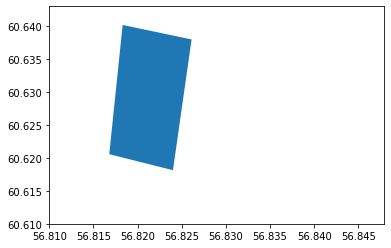

In [9]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

polygon = Polygon([(56.824009, 60.618137), (56.826119, 60.637975), (56.818314, 60.640179), (56.816798, 60.620565),])

#polygon = Polygon([(0,5), (1,1), (3,0),])

fig, ax = plt.subplots(1, 1)

ax.add_patch(polygon)

plt.ylim(60.61, 60.643)
plt.xlim(56.81, 56.8479)

In [4]:
def point_inside_polygon(x, y, poly, include_edges = True):
    '''
    Проверьте, находится ли точка (x,y) внутри многоугольника poly.

    poly - это многоугольник с N вершинами, определенный как 
    [(x1,y1),...,(xN,yN)] или [(x1,y1),...,(xN,yN),(x1,y1)]
    (функция отлично работает в обоих случаях)

    Геометрическая идея: точка находится внутри многоугольника, если горизонтальный луч
    справа от точки пересекает многоугольник четное число раз. 
    Отлично работает для невыпуклых многоугольников.
    '''
    n = len(poly)
    inside = False

    p1x, p1y = poly[0]
    for i in range(1, n + 1):
        p2x, p2y = poly[i % n]
        if p1y == p2y:
            if y == p1y:
                if min(p1x, p2x) <= x <= max(p1x, p2x):
                    # point is on horisontal edge
                    inside = include_edges
                    break
                elif x < min(p1x, p2x):  # point is to the left from current edge
                    inside = not inside
        else:  # p1y!= p2y
            if min(p1y, p2y) <= y <= max(p1y, p2y):
                xinters = (y - p1y) * (p2x - p1x) / float(p2y - p1y) + p1x

                if x == xinters:  # point is right on the edge
                    inside = include_edges
                    break

                if x < xinters:  # point is to the left from current edge
                    inside = not inside

        p1x, p1y = p2x, p2y

    return inside

In [22]:
from tqdm import tqdm

k = len(df['Широта'])

districts = []

for i in tqdm(range(0, k, 1), 'Обработано'):
    for j, c, p in zip(range(1, len(polygons.keys()) + 1, 1), polygons.keys(), polygons.values()): #enumerate(polygons.items())
        poly = p
        x = df['Широта'][i] 
        y = df['Долгота'][i]
        res = point_inside_polygon(x, y, poly, include_edges = True)

        if res == True:
            district = c
            districts.append(district)
            break
        
        if (j == len(polygons.keys()) and res == False):
            district = 999
            districts.append(district)

Обработано: 100%|██████████████████████████████████████████████████████████████| 13332/13332 [00:05<00:00, 2229.32it/s]


In [23]:
districts

['Академический',
 'Юго_Западный',
 'Центральный_1',
 'Уралмаш',
 'Уралмаш',
 'Пионерский',
 'Уктус',
 'Космонавтов',
 'Центр',
 'Уктус',
 'Уктус',
 'Пионерский',
 'ВИЗ',
 'Академический',
 'Южный',
 'Центр',
 'Центральный_1',
 'Академический',
 'Компрессорный',
 'Южный',
 'Юго_Западный',
 'УНЦ',
 'Пионерский',
 'Пионерский',
 'Юго_Западный',
 'Эльмаш',
 'Вторчермет',
 'Эльмаш',
 'Вторчермет',
 999,
 'Уралмаш',
 'Эльмаш',
 'Старая_сортировка',
 'Академический',
 'Эльмаш',
 'Уктус',
 'Южный',
 'Уралмаш',
 'Академический',
 'Академический',
 'Пионерский',
 'Юго_Западный',
 'Новая_сортировка',
 'Солнечный',
 'Заречный',
 'Академический',
 'Юго_Западный',
 'Солнечный',
 'Уралмаш',
 'Химмаш',
 'Вторчермет',
 999,
 'Академический',
 'Южный',
 'Юго_Западный',
 'Академический',
 'Южный',
 'Академический',
 'Компрессорный',
 'Вторчермет',
 'Вторчермет',
 'Втузгородок',
 'Уралмаш',
 'Уктус',
 'Академический',
 'Юго_Западный',
 'Космонавтов',
 'Уктус',
 'Академический',
 'Юго_Западный',
 'Старая_

In [24]:
len(districts)

13332

In [25]:
df_poly = pd.DataFrame(districts, columns = ['Район'])
df_poly

,Район
0,Академический
1,Юго_Западный
2,Центральный_1
3,Уралмаш
4,Уралмаш
...,...
13327,Академический
13328,Космонавтов
13329,Юго_Западный
13330,Уктус


In [45]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Районы_кв.xlsx')
df_poly.to_excel(writer, 'данные')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_16576\707424510.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [164]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),dup_all,dup_1,dup_2,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,143589.743590,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,187500.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,91304.347826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13327,8462_авито,0,авито,15.250571,4199900,0,126503.012048,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Квартал «Олимпика»,Дом 12.5,другое,Сдан 4 кв. 2022,NaN
13328,8463_авито,0,авито,15.384126,4800000,0,166089.965398,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «Космос»,Дом 2 (Кассиопея),другое,Сдан 3 кв. 2023,NaN
13329,8464_авито,0,авито,15.293700,4385000,0,141451.612903,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
13330,8465_авито,1,авито,15.332833,4560000,0,106046.511628,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «River Park»,NaN,другое,Сдан 4 кв. 2023,NaN


In [165]:
df = df[df['Мусор'] == 0]
len(df)

11889

In [27]:
polygons.keys()

dict_keys(['Центр', 'Парковой', 'Клевер_Парк', 'Зеленая_Роща', 'Южный', 'Ботанический', 'Уктус', 'Елизавет', 'Химмаш', 'Нижнеисетский', 'Кольцово', 'Компрессорный', 'Лечебный', 'Вторчермет', 'Академический', 'Юго_Западный', 'Волгоградский', 'ВИЗ', 'Заречный', 'Вокзальный', 'Новая_сортировка', 'Старая_сортировка', 'Звездочка', 'Уралмаш', 'Эльмаш', 'Пионерский', 'Втузгородок', 'Комсомольский_1', 'Комсомольский_2', 'Синие_Камни', 'Центральный_1', 'Центральный_2', 'Первомайский', 'Сибирский', 'Шарташский_рынок', 'Новокольцовский', 'Большеконный', 'Калиновский', 'Рудный', 'Космонавтов', 'Завокзальный', 'Зеленая_горка', 'Изоплит', 'Шарташ', 'Птицефабрика', 'Солнечный', 'УНЦ'])

In [158]:
t = df[df['Районы_1'] == 'УНЦ']
t

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),dup_all,dup_1,dup_2,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
1155,1156_этажи,0,этажи,15.363073,4700000,0,94000.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2624,2625_этажи,0,этажи,14.978661,3200000,3300000,100000.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7920,3055_авито,0,авито,14.972392,3180000,0,96363.636364,NaN,NaN,NaN,...,NaN,NaN,NaN,свободная,NaN,NaN,NaN,NaN,NaN,NaN
9779,4914_авито,0,авито,15.363073,4700000,0,94000.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,свободная,NaN,NaN,NaN,NaN,NaN,NaN
10357,5492_авито,0,авито,15.262430,4250000,0,78413.284133,NaN,NaN,NaN,...,NaN,NaN,NaN,свободная,NaN,NaN,NaN,NaN,NaN,NaN
10760,5895_авито,0,авито,15.363073,4700000,0,94000.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,свободная,NaN,NaN,NaN,NaN,NaN,NaN
11106,6241_авито,0,авито,15.394489,4850000,0,89814.814815,NaN,NaN,NaN,...,NaN,NaN,NaN,альтернативная,NaN,NaN,NaN,NaN,NaN,NaN
12220,7355_авито,0,авито,15.464169,5200000,0,100970.873786,NaN,NaN,NaN,...,NaN,NaN,NaN,альтернативная,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

#выводим полигон
folium.Polygon(polygons.get(t['Районы_1'].iloc[0]),
               color = "black",
               weight = 1,
               fill = True,
               fill_color = "lightseagreen",
               fill_opacity = 0.4,
               popup = t['Районы_1'].iloc[0]
              ).add_to(map)


lat = t['Широта']
lon = t['Долгота']
cities = t['ID']  #df.index
price = t['Цена(кв.м)'] #.round(decimals = 0)

def color_change(p):
    if(p < 80000):
        return('lightgreen')
    elif(80000 <= p < 150000):
        return('green')
    elif(150000 <= p < 200000):
        return('orange')
    else:
        return('red')

#выводим точки
for lat, lon, cities, price in zip(lat, lon, cities, price):
    folium.Marker(location = [lat, lon], 
                  popup = cities, 
                  icon = folium.Icon(color = color_change(price))).add_to(map)

map

In [166]:
t = df[df['Районы_1'] == 999]
t

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),dup_all,dup_1,dup_2,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос


In [153]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

lat = t['Широта']
lon = t['Долгота']
cities = t['ID']  #df.index
price = t['Цена(кв.м)'] #.round(decimals = 0)

def color_change(p):
    if(p < 80000):
        return('lightgreen')
    elif(80000 <= p < 150000):
        return('green')
    elif(150000 <= p < 200000):
        return('orange')
    else:
        return('red')

#выводим точки
for lat, lon, cities, price in zip(lat, lon, cities, price):
    folium.Marker(location = [lat, lon], 
                  popup = cities, 
                  icon = folium.Icon(color = color_change(price))).add_to(map)

map

In [167]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/БД_элитка, виды.xlsx', sheet_name = 1)
df

,№,Наименование ЖК,Район города,Тип,Наименование улицы,Номер дома,Адрес,Д,Адрес_ya,Долгота,Широта,Сцепка_к,Д.1,Проверка,Видовые характеристики,Конкретика,Витрины,"Диапазон стоимости, руб./кв. м",Источник информации цен,Ссылка на сайт ЖК
0,1,ЖК Гражданская 11,Завокзальный,улица,Гражданская,11,"Екатеринбург, улица Гражданская, 11",11,"Россия, Свердловская область, Екатеринбург, Гр...",60.586479,56.850693,60.586479 56.850693,11,True,есть,"городской пруд, город",нет,185 211 - 213 571,https://ekaterinburg.n1.ru/zhilye-kompleksy/na...,https://ekaterinburg.n1.ru/zhilye-kompleksy/na...
1,2,ЖК Макаровский Квартал,Центральный,набережная,Олимпийская,5,"Екатеринбург, набережная Олимпийская, 5",5,"Россия, Свердловская область, Екатеринбург, Ол...",60.592983,56.847690,60.592983 56.84769,5,True,есть,"городской пруд, город",есть,288 793 - 751 445,https://ekaterinburg.n1.ru/kupit/kvartiru/zhil...,https://ugmkstroy.ru/projects/makarovsky
2,3,ЖК Макаровский Квартал,Центральный,набережная,Олимпийская,7,"Екатеринбург, набережная Олимпийская, 7",7,"Россия, Свердловская область, Екатеринбург, Ол...",60.591716,56.848069,60.591716 56.848069,7,True,есть,"городской пруд, город",NaN,NaN,NaN,NaN
3,4,ЖК Макаровский Квартал,Центральный,набережная,Олимпийская,9,"Екатеринбург, набережная Олимпийская, 9",9,"Россия, Свердловская область, Екатеринбург, Ол...",60.592094,56.848911,60.592094 56.848911,9,True,есть,"городской пруд, город",NaN,NaN,NaN,NaN
4,5,ЖК Макаровский Квартал,Центральный,набережная,Олимпийская,9/1,"Екатеринбург, набережная Олимпийская, 9/1",9/1,"Россия, Свердловская область, Екатеринбург, Ол...",60.592812,56.849433,60.592812 56.849433,9/1,True,есть,"городской пруд, город",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,ЖК Белый Парус,Верх-Исетский,улица,Татищева,140,"Екатеринбург, улица Татищева, 140",140,"Россия, Свердловская область, Екатеринбург, ул...",60.533838,56.837179,60.533838 56.837179,140,True,есть,р. Исеть (широкая в разливе),NaN,NaN,NaN,NaN
71,72,ЖК Здоровье,Верх-Исетский,улица,Татищева,177,"Екатеринбург, улица Татищева, 177",177,"Россия, Свердловская область, Екатеринбург, ул...",60.525079,56.835717,60.525079 56.835717,177,True,есть,р. Исеть (широкая в разливе),нет,139474,https://ekaterinburg.n1.ru/zhilye-kompleksy/na...,https://ekaterinburg.n1.ru/zhilye-kompleksy/na...
72,73,ЖК Здоровье,Верх-Исетский,улица,Татищева,179,"Екатеринбург, улица Татищева, 179",179,"Россия, Свердловская область, Екатеринбург, ул...",60.523867,56.835815,60.523867 56.835815,179,True,есть,р. Исеть (широкая в разливе),NaN,NaN,NaN,NaN
73,74,ЖК Стрелки,Железнодорожный,улица,Стрелочников,2,"Екатеринбург, улица Стрелочников, 2",2,"Россия, Свердловская область, Екатеринбург, ул...",60.583829,56.856003,60.583829 56.856003,2,True,есть,"городской пруд, город",нет,124 273 - 173 686,https://ekaterinburg.n1.ru/zhilye-kompleksy/na...,https://ekaterinburg.n1.ru/zhilye-kompleksy/na...


In [169]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

lat = df['Широта']
lon = df['Долгота']
cities = df['Наименование ЖК']  #df.index

#выводим точки
for lat, lon, cities in zip(lat, lon, cities):
    folium.Marker(location = [lat, lon], 
                  popup = cities).add_to(map)

map

# Метро

In [5]:
#станции метро - списки

#Проспект космонавтов
Stm_1 = (56.901678, 60.613967)
#Уралмаш
Stm_2 = (56.888493, 60.613557)
#Машиностроителей
Stm_3 = (56.878120, 60.612121)
#Уральская
Stm_4 = (56.857906, 60.600432)
#Динамо
Stm_5 = (56.847735, 60.599178)
#Площадь 1905 года
Stm_6 = (56.836107, 60.599297)
#Геологическая
Stm_7 = (56.828294, 60.601884)
#Чкаловская
Stm_8 = (56.808536, 60.609977)
#Ботаническая
Stm_9 = (56.797105, 60.632541)

Stm_all = [(56.901678, 60.613967), (56.888493, 60.613557), (56.878120, 60.612121), (56.857906, 60.600432),
           (56.847735, 60.599178), (56.836107, 60.599297), (56.828294, 60.601884), (56.808536, 60.609977), 
           (56.797105, 60.632541)
          ]

In [11]:
Stm_all_s = pd.DataFrame(Stm_all)
Stm_all_s

,0,1
0,56.901678,60.613967
1,56.888493,60.613557
2,56.878120,60.612121
3,56.857906,60.600432
4,56.847735,60.599178
5,56.836107,60.599297
6,56.828294,60.601884
7,56.808536,60.609977
8,56.797105,60.632541


In [12]:
Stm_all_s = Stm_all_s.rename({0: 'lat', 1: 'lon'}, axis = 'columns')
Stm_all_s

,lat,lon
0,56.901678,60.613967
1,56.888493,60.613557
2,56.878120,60.612121
3,56.857906,60.600432
4,56.847735,60.599178
5,56.836107,60.599297
6,56.828294,60.601884
7,56.808536,60.609977
8,56.797105,60.632541


In [13]:
Stm_all_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     9 non-null      float64
 1   lon     9 non-null      float64
dtypes: float64(2)
memory usage: 272.0 bytes


In [22]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 11.4)

lat = Stm_all_s['lat']
lon = Stm_all_s['lon']

for lat, lon in zip(lat, lon):
    folium.Marker(location = [lat, lon]).add_to(map)

map

In [11]:
from tqdm import tqdm

k = len(df['Широта'])

dist_min = []
dist = []

for i in tqdm(range(0, k, 1), 'Обработано'):
    
    dist.clear() #очищаем список значений
    
    for Stm in Stm_all:
        dote = (df['Широта'][i], df['Долгота'][i])
        dis = GD(Stm, dote).km * 1000
        dist.append(dis)
    
    dis_min = min(dist)
    dist_min.append(dis_min)

Обработано: 100%|███████████████████████████████████████████████████████████████| 13332/13332 [00:30<00:00, 430.63it/s]


In [12]:
dist_min

[5679.705749816952,
 1297.7949735124496,
 2127.3718939521473,
 1151.5107076453617,
 1927.6517897009262,
 2652.3997142581075,
 3430.890903002416,
 1101.024484723523,
 1008.8386052890752,
 1908.580933112588,
 4299.669140985674,
 1897.2366158232064,
 2668.0573159549585,
 6203.4397300292785,
 559.0523110555288,
 557.2468565525992,
 1041.169432164432,
 5347.754821322963,
 8507.666194767227,
 1049.8173716763222,
 2185.628034979175,
 6196.171189663299,
 1929.6563569437617,
 2548.7103435756976,
 1998.287286183481,
 674.50277828675,
 2952.4977353395475,
 1425.274608118208,
 2610.2262256941303,
 13878.44973212751,
 1391.5349513464344,
 605.2911944694835,
 4464.346946419517,
 6761.957496874641,
 2050.071655535252,
 1583.7453707126604,
 836.1499405792484,
 1071.301790019519,
 5581.859762764721,
 6081.385929010286,
 1846.7669702013748,
 2863.404648198942,
 2744.851831725426,
 6940.533699678285,
 1350.8333294817448,
 5356.701805749778,
 1989.7795986235055,
 6926.420653212779,
 1083.8772615670616,
 6

In [13]:
len(dist_min)

13332

In [14]:
df_poly['Раст_метро'] = dist_min
df_poly

,Раст_центр,Раст_метро
0,5858.724489,5679.705750
1,3732.854971,1297.794974
2,2742.075053,2127.371894
3,7940.124496,1151.510708
4,7764.493458,1927.651790
...,...,...
13327,8236.055779,6729.218549
13328,3053.891711,898.839443
13329,3330.659908,2308.243205
13330,7579.187271,2599.094091


In [56]:
df['Раст_метро'] = dist_min
df

,Цена,Цена(кв.м),Комнатность_1,Комнатность_2,ОПлощадь,КПлощадь_1,КПлощадь_2,КПлощадь_д,КПлощадь_д_1,ЖПлощадь_1,...,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос,Район
0,12200000,123606.889564,2,2к,98.7,14,14.0,0.141844,0.141844,no info,...,2,"детская площадка, спортивная площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN,Юго-Западный
1,3672000,87014.218009,2,2к,42.2,7,7.0,0.165877,0.165877,no info,...,NaN,NaN,NaN,3 м,NaN,NaN,NaN,NaN,NaN,Старая сортировка
2,4950000,115925.058548,2,2к,42.7,5,5.0,0.117096,0.117096,no info,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Вокзальный
3,5890000,95928.338762,4,4к,61.4,6.2,6.2,0.100977,0.100977,44.5,...,NaN,NaN,открытая во дворе,2.7 м,газ,NaN,NaN,NaN,NaN,Южный
4,5390000,101506.591337,2,2к,53.1,10.7,10.7,0.201507,0.201507,30.3,...,1,закрытая территория,NaN,NaN,NaN,1,NaN,NaN,NaN,Академический
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,17800000,129643.117261,3,3к,137.3,15,15.0,0.10925,0.109250,80,...,2,"закрытая территория, детская площадка",подземная,2.8 м,NaN,1,"холодильник, стиральная машина, посудомоечная...",есть,NaN,Парковой
7615,6100000,84370.677732,3,3к,72.3,9.5,9.5,0.131397,0.131397,45,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Химмаш
7616,9826880,122836.000000,3,3к,80.0,13,13.0,0.1625,0.162500,48,...,2,детская площадка,подземная,NaN,газ,NaN,"кондиционер, холодильник, посудомоечная машина",NaN,NaN,Академический
7617,4350000,106617.647059,1,1к,40.8,8.5,8.5,0.208333,0.208333,19,...,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,2.7 м,консьерж,2,NaN,NaN,NaN,Новая сортировка


In [15]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Местоположение_кв.xlsx')
df_poly.to_excel(writer, 'данные')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_16576\1848660887.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [163]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб/Квартиры_Ектб_раб.xlsx', sheet_name = 0)
df

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Стас\\Ученье - Свет\\Оценка\\Аспирантура\\Видео по NN, Data mining, ABC и т.д\\Распределение Гаусса, регрессия\\Python\\!Наработки\\Квартиры Ектб/Квартиры_Ектб_раб.xlsx'

In [5]:
t = df[df['Район_2'] == "Комсомольский_2"]
t

,Цена,Цена_pred,MAE,MAPE,Цена(кв.м)_pred,Цена(кв.м),Комнатность_1,Комнатность_2,ОПлощадь,КПлощадь_1,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
183,4150000,4.759908e+06,-6.099080e+05,-0.146966,114420.864542,99759.615385,2,2к,41.6,18,...,22 из 25,2,"детская площадка, спортивная площадка","подземная, открытая во дворе",NaN,NaN,NaN,NaN,NaN,NaN
383,3300000,3.823643e+06,-5.236432e+05,-0.158680,159318.468059,137500.000000,студия,студия,24.0,no info,...,23 из 25,NaN,детская площадка,NaN,0.3 м,NaN,1,NaN,NaN,NaN
826,3080000,4.812153e+06,-1.732153e+06,-0.562387,132202.013185,84615.384615,студия,1к,36.4,no info,...,17 из 25,1,"детская площадка, спортивная площадка",открытая во дворе,NaN,NaN,1,NaN,NaN,NaN
971,2700000,3.242581e+06,-5.425811e+05,-0.200956,135107.544210,112500.000000,студия,студия,24.0,no info,...,11 из 25,NaN,NaN,открытая во дворе,3.1 м,NaN,NaN,NaN,NaN,NaN
1070,3450000,3.783812e+06,-3.338124e+05,-0.096757,126127.079239,115000.000000,студия,1к,30.0,no info,...,12 из 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,2850000,3.306414e+06,-4.564138e+05,-0.160145,132256.552286,114000.000000,студия,студия,25.0,no info,...,8 из 25,2,NaN,открытая во дворе,NaN,NaN,1,NaN,NaN,NaN
1479,3110000,3.681489e+06,-5.714887e+05,-0.183758,125648.080012,106143.344710,студия,студия,29.3,no info,...,13 из 25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,5550000,6.972855e+06,-1.422855e+06,-0.256370,106945.632081,85122.699387,2,2к,65.2,8,...,9 из 25,2,NaN,"подземная, открытая во дворе",NaN,NaN,1,NaN,NaN,NaN
1835,9000000,1.084228e+07,-1.842282e+06,-0.204698,108422.817685,90000.000000,4,4к,100.0,14,...,15 из 16,1,детская площадка,открытая во дворе,NaN,NaN,NaN,холодильник,NaN,NaN
1975,2650000,3.559198e+06,-9.091982e+05,-0.343094,131822.155425,98148.148148,студия,студия,27.0,no info,...,20 из 25,2,детская площадка,"подземная, открытая во дворе",NaN,NaN,1,NaN,NaN,NaN


In [6]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

lat = t['Широта']
lon = t['Долгота']
cities = t['Адрес_2']  #df.index
price = t['Цена(кв.м)'] #.round(decimals = 0)

def color_change(p):
    if(p < 80000):
        return('lightgreen')
    elif(80000 <= p < 150000):
        return('green')
    elif(150000 <= p < 200000):
        return('orange')
    else:
        return('red')

#выводим точки
for lat, lon, cities, price in zip(lat, lon, cities, price):
    folium.Marker(location = [lat, lon], 
                  popup = cities, 
                  icon = folium.Icon(color = color_change(price))).add_to(map)

map

# Форма_310

In [23]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/адр.xlsx', sheet_name = 0)
df

,Адрес ЕГРН (есть отличия),Unnamed: 1,Адрес_Yandex,Долгота,Широта,Сцепка_к,Unnamed: 6,Unnamed: 7,Unnamed: 8,Этаж_1,...,Раст_центр_1,Раст_центр_2,Раст_метро_1,Раст_метро_2,Районы_1,Районы_2,Вид_1,ЖК_БД,Многоуровневость,Терраса
0,"Свердловская область, г. Нижний Тагил, ул. Кос...","Свердловская область, г. Нижний Тагил, ул. Кос...","Россия, Свердловская область, Нижний Тагил, ул...",59.943097,57.925742,59.943097 57.925742,NaN,NaN,NaN,NaN,...,127388.667245,более_10000,120962.093058,на_удалении,999,NaN,нет,нет,0.0,0.0
1,"Свердловская область, г. Первоуральск, пр-кт. ...","Свердловская область, г. Первоуральск, пр-кт. ...","Россия, Свердловская область, Первоуральск, пр...",59.936898,56.907426,59.936898 56.907426,NaN,NaN,NaN,NaN,...,40984.067926,более_10000,40825.207301,на_удалении,999,NaN,NaN,нет,NaN,NaN
2,"Свердловская область, город Екатеринбург, улиц...","Свердловская область, город Екатеринбург, улиц...","Россия, Свердловская область, Екатеринбург, ул...",60.589938,56.827606,60.589938 56.827606,NaN,NaN,NaN,NaN,...,1201.818941,до_1500,733.344373,рядом,Центр,NaN,NaN,нет,NaN,NaN
3,"Российская Федерация, Свердловская область, му...","Российская Федерация, Свердловская область, му...","Россия, Свердловская область, Екатеринбург, ул...",60.675376,56.842964,60.675376 56.842964,NaN,NaN,NaN,NaN,...,4829.445830,от_1500_до_5000,4680.163161,на_удалении,Комсомольский_1,NaN,NaN,нет,NaN,NaN
4,"Свердловская область, г. Первоуральск, ул. Шко...","Свердловская область, г. Первоуральск, ул. Шко...","Россия, Свердловская область, Первоуральск, Шк...",59.949178,56.897714,59.949178 56.897714,NaN,NaN,NaN,NaN,...,40059.574460,более_10000,39954.272318,на_удалении,999,NaN,NaN,нет,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,"Свердловская область, г. Екатеринбург, ул. Кра...","Свердловская область, г. Екатеринбург, ул. Кра...","Россия, Свердловская область, Екатеринбург, ул...",60.585320,56.886676,60.58532 56.886676,NaN,NaN,NaN,NaN,...,5497.060531,от_5000_до_10000,1733.047221,на_удалении,Уралмаш,NaN,NaN,нет,NaN,NaN
461,"Свердловская область, г. Екатеринбург, ул. Ясн...","Свердловская область, г. Екатеринбург, ул. Ясн...","Россия, Свердловская область, Екатеринбург, Яс...",60.574792,56.817740,60.574792 56.81774,NaN,NaN,NaN,NaN,...,2599.658314,от_1500_до_5000,2029.228567,на_удалении,Юго_Западный,NaN,NaN,нет,NaN,NaN
462,"Свердловская область, р-н. Сысертский, г. Арам...","Свердловская область, р-н. Сысертский, г. Арам...","Россия, Свердловская область, Арамиль, Новая у...",60.860384,56.680375,60.860384 56.680375,NaN,NaN,NaN,NaN,...,23808.379082,более_10000,19062.488797,на_удалении,999,NaN,NaN,нет,NaN,NaN
463,620041 Россия обл Свердловская г Екатеринбург ...,620041 Россия обл Свердловская г Екатеринбург ...,"Россия, Свердловская область, Екатеринбург, ул...",60.619789,56.859665,60.619789 56.859665,NaN,NaN,NaN,NaN,...,2817.258232,от_1500_до_5000,1196.955359,на_удалении,Пионерский,NaN,NaN,нет,NaN,NaN


In [7]:
l = []
centre = (56.837716, 60.596828)
k = len(df['Широта'])

for j in range(0, k, 1):
    dote = (df['Широта'][j], df['Долгота'][j])
    dis = GD(centre, dote).km * 1000
    l.append(dis)
l

[127388.66724459888,
 40984.067926444484,
 1201.8189409668314,
 4829.445830181351,
 40059.574459968506,
 1144.7616831022185,
 326938.9452868106,
 3338.172029187426,
 1806.4050110948415,
 5858.724488838673,
 2042.6779246537535,
 6541.76685879535,
 135094.04528368506,
 2956.0151946539518,
 6855.396639034273,
 6855.396639034273,
 6855.396639034273,
 96521.5549085668,
 4189.429395946009,
 525.4093764272787,
 1748.7595755279367,
 3764.536033049268,
 2636.163457585377,
 7697.838616431908,
 5730.608820365329,
 311306.38233564346,
 1256.5362671893038,
 2624.8390208585024,
 7063.953347432042,
 75968.10464501577,
 175525.30438443398,
 123544.48786537327,
 1217.0049647574074,
 1874.8732119235685,
 3397.1695004800454,
 4872.365827148376,
 1022.594239579224,
 1409.8977171709034,
 3613.2140484289794,
 1979.6650632627795,
 1409.8977171709034,
 3721.542228544434,
 6708.4190725765975,
 4941.851545653176,
 3432.572013205526,
 7726.312995441457,
 4846.6653348255195,
 3257.1331802041777,
 1635.43183637179

In [8]:
len(l)

465

In [9]:
df_poly = pd.DataFrame(l)
df_poly.columns = ['Раст_центр']
df_poly

,Раст_центр
0,127388.667245
1,40984.067926
2,1201.818941
3,4829.445830
4,40059.574460
...,...
460,5497.060531
461,2599.658314
462,23808.379082
463,2817.258232


In [10]:
from tqdm import tqdm

k = len(df['Широта'])

districts = []

for i in tqdm(range(0, k, 1), 'Обработано'):
    for j, c, p in zip(range(1, len(polygons.keys()) + 1, 1), polygons.keys(), polygons.values()): #enumerate(polygons.items())
        poly = p
        x = df['Широта'][i] 
        y = df['Долгота'][i]
        res = point_inside_polygon(x, y, poly, include_edges = True)

        if res == True:
            district = c
            districts.append(district)
            break
        
        if (j == len(polygons.keys()) and res == False):
            district = 999
            districts.append(district)

Обработано: 100%|██████████████████████████████████████████████████████████████████| 465/465 [00:00<00:00, 1462.27it/s]


In [11]:
districts

[999,
 999,
 'Центр',
 'Комсомольский_1',
 999,
 'Центр',
 999,
 'Юго_Западный',
 'Центральный_1',
 'Академический',
 'ВИЗ',
 'Академический',
 999,
 'Пионерский',
 'Эльмаш',
 'Эльмаш',
 'Эльмаш',
 999,
 'Пионерский',
 'Центр',
 'ВИЗ',
 'Втузгородок',
 'Южный',
 'Академический',
 'Уралмаш',
 999,
 'Центральный_1',
 'ВИЗ',
 'Академический',
 999,
 999,
 999,
 'Центр',
 'Центральный_1',
 'Южный',
 'Комсомольский_1',
 'Центр',
 'Центр',
 'Южный',
 'Зеленая_Роща',
 'Центр',
 'Волгоградский',
 'Эльмаш',
 'Новая_сортировка',
 'Новая_сортировка',
 'Старая_сортировка',
 'Новая_сортировка',
 'Шарташский_рынок',
 'Вокзальный',
 'Пионерский',
 'ВИЗ',
 'ВИЗ',
 'Первомайский',
 999,
 'Эльмаш',
 'Уралмаш',
 'Волгоградский',
 'Зеленая_Роща',
 999,
 'Южный',
 'Первомайский',
 'Пионерский',
 'Южный',
 'Юго_Западный',
 'Юго_Западный',
 'Южный',
 'Старая_сортировка',
 'Южный',
 999,
 'Южный',
 'Пионерский',
 'Парковой',
 'Вторчермет',
 'Юго_Западный',
 'Юго_Западный',
 'Центр',
 'Центральный_1',
 'Центра

In [12]:
len(districts)

465

In [13]:
df_poly['Район'] = districts
df_poly

,Раст_центр,Район
0,127388.667245,999
1,40984.067926,999
2,1201.818941,Центр
3,4829.445830,Комсомольский_1
4,40059.574460,999
...,...,...
460,5497.060531,Уралмаш
461,2599.658314,Юго_Западный
462,23808.379082,999
463,2817.258232,Пионерский


In [14]:
from tqdm import tqdm

k = len(df['Широта'])

dist_min = []
dist = []

for i in tqdm(range(0, k, 1), 'Обработано'):
    
    dist.clear() #очищаем список значений
    
    for Stm in Stm_all:
        dote = (df['Широта'][i], df['Долгота'][i])
        dis = GD(Stm, dote).km * 1000
        dist.append(dis)
    
    dis_min = min(dist)
    dist_min.append(dis_min)

Обработано: 100%|███████████████████████████████████████████████████████████████████| 465/465 [00:01<00:00, 444.13it/s]


In [15]:
len(dist_min)

465

In [16]:
df_poly['Раст_метро'] = dist_min
df_poly

,Раст_центр,Район,Раст_метро
0,127388.667245,999,120962.093058
1,40984.067926,999,40825.207301
2,1201.818941,Центр,733.344373
3,4829.445830,Комсомольский_1,4680.163161
4,40059.574460,999,39954.272318
...,...,...,...
460,5497.060531,Уралмаш,1733.047221
461,2599.658314,Юго_Западный,2029.228567
462,23808.379082,999,19062.488797
463,2817.258232,Пионерский,1196.955359


In [17]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Расст_районы_метро_310.xlsx')
df_poly.to_excel(writer, 'data')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_29068\1034613553.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [24]:
map = folium.Map(location = [56.836254, 60.597492], zoom_start = 12)

lat = df['Широта']
lon = df['Долгота']
cities = df['Адрес_Yandex']  #df.index


#выводим точки
for lat, lon, cities in zip(lat, lon, cities):
    folium.Marker(location = [lat, lon], 
                  popup = cities 
                  ).add_to(map)

map